In [1]:
import requests
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

import numpy as np

Maginificent 7: AAPL, MSFT, GOOG, AMZN, NVDA, TSLA, META

Bottom 20 (In order 481 -> 500): ETSY, RHI, CHRW, FRT, NCLH, PNW, MKTX, FMC, MHK, PARA, BWA, IVZ, HAS, GNRC, CMA, XRAY, ZION, VFC, WHR, DOC

In [4]:
from polygon import RESTClient

API_KEY = '3SR1p8vn6KoWZms32_FnSXA69ITJsUgw'

client = RESTClient(API_KEY)

company = "DOC"

aggs = []
for a in client.list_aggs(
    company,
    1,
    "minute",
    "2023-09-01",
    "2024-02-01",
    limit=50000,
):
    agg_dict = a.__dict__
    aggs.append(agg_dict)

df = pd.DataFrame(aggs)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.set_index('timestamp')
df['returns'] = (df['close'] / df['open'] - 1) * 100

df.to_csv(f'{company}_Data.csv')

In [5]:
aapl = pd.read_csv('Data/Mag_7/AAPL_Data.csv').reset_index().drop(['otc'], axis=1)
googl = pd.read_csv('Data/Mag_7/GOOG_Data.csv').reset_index().drop(['otc'], axis=1)
nvda = pd.read_csv('Data/Mag_7/NVDA_Data.csv').reset_index().drop(['otc'], axis=1)
spy = pd.read_csv('Data/SPY_Data.csv').reset_index().drop(['otc'], axis=1)
amzn = pd.read_csv('Data/Mag_7/AMZN_Data.csv').reset_index().drop(['otc'], axis=1)
meta = pd.read_csv('Data/Mag_7/META_Data.csv').reset_index().drop(['otc'], axis=1)
msft = pd.read_csv('Data/Mag_7/MSFT_Data.csv').reset_index().drop(['otc'], axis=1)
tsla = pd.read_csv('Data/Mag_7/TSLA_Data.csv').reset_index().drop(['otc'], axis=1)

spy['timestamp'] = pd.to_datetime(spy['timestamp'])
googl['timestamp'] = pd.to_datetime(googl['timestamp'])
nvda['timestamp'] = pd.to_datetime(nvda['timestamp'])
aapl['timestamp'] = pd.to_datetime(aapl['timestamp'])
amzn['timestamp'] = pd.to_datetime(amzn['timestamp'])
meta['timestamp'] = pd.to_datetime(meta['timestamp'])
msft['timestamp'] = pd.to_datetime(msft['timestamp'])
tsla['timestamp'] = pd.to_datetime(tsla['timestamp'])

spy = spy.set_index('timestamp')
googl = googl.set_index('timestamp')
nvda = nvda.set_index('timestamp')
aapl = aapl.set_index('timestamp')
amzn = amzn.set_index('timestamp')
meta = meta.set_index('timestamp')
msft = msft.set_index('timestamp')
tsla = tsla.set_index('timestamp')

spy['returns'] = (spy['close'] / spy['open'] - 1) * 100
googl['returns'] = (googl['close'] / googl['open'] - 1) * 100
nvda['returns'] = (nvda['close'] / nvda['open'] - 1) * 100
aapl['returns'] = (aapl['close'] / aapl['open'] - 1) * 100
amzn['returns'] = (amzn['close'] / amzn['open'] - 1) * 100
meta['returns'] = (meta['close'] / meta['open'] - 1) * 100
msft['returns'] = (msft['close'] / msft['open'] - 1) * 100
tsla['returns'] = (tsla['close'] / tsla['open'] - 1) * 100


spy.loc[(spy.index >= '2023-09-01') & (spy.index <= '2023-09-02')]

index      open      high     low   close  volume  \
timestamp                                                                
2023-09-01 08:00:00      0  451.5300  451.6100  451.12  451.61  2622.0   
2023-09-01 08:01:00      1  451.5500  451.5500  451.55  451.55   331.0   
2023-09-01 08:02:00      2  451.6000  451.6000  451.57  451.59  3030.0   
2023-09-01 08:03:00      3  451.4700  451.4800  451.47  451.48   507.0   
2023-09-01 08:04:00      4  451.5200  451.5200  451.52  451.52   361.0   
...                    ...       ...       ...     ...     ...     ...   
2023-09-01 23:55:00    783  450.8600  450.8600  450.86  450.86   246.0   
2023-09-01 23:56:00    784  450.8500  450.9000  450.85  450.85  2042.0   
2023-09-01 23:57:00    785  450.8600  450.8900  450.86  450.89   596.0   
2023-09-01 23:58:00    786  450.8700  450.9500  450.87  450.89  2858.0   
2023-09-01 23:59:00    787  450.9499  450.9499  450.89  450.92  2769.0   

                         vwap  transactions   returns  
timestamp                                              
2023-09-01 08:00:00  451.5109            17  0.017718  
2023-09-01 08:01:00  451.5517             7  0.000000  
2023-09-01 08:02:00  451.5909            21 -0.002214  
2023-09-01 08:03:00  451.4846             8  0.002215  
2023-09-01 08:04:00  451.5507             5  0.000000  
...                       ...           ...       ...  
2023-09-01 23:55:00  450.8595            17  0.000000  
2023-09-01 23:56:00  450.8808            87  0.000000  
2023-09-01 23:57:00  450.8734            14  0.006654  
2023-09-01 23:58:00  450.9065            33  0.004436  
2023-09-01 23:59:00  450.9302            24 -0.006630  

[788 rows x 9 columns]

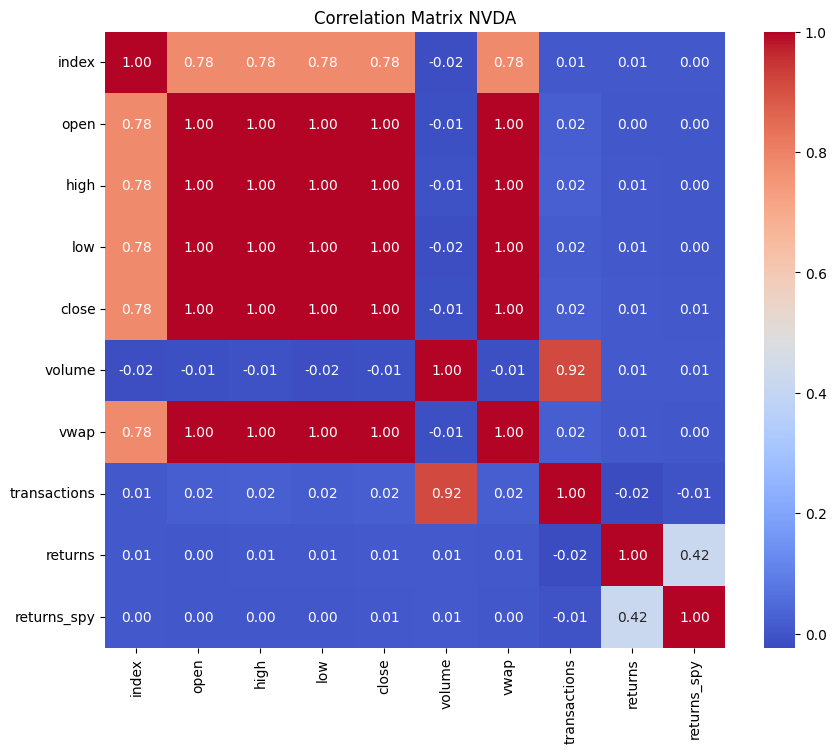

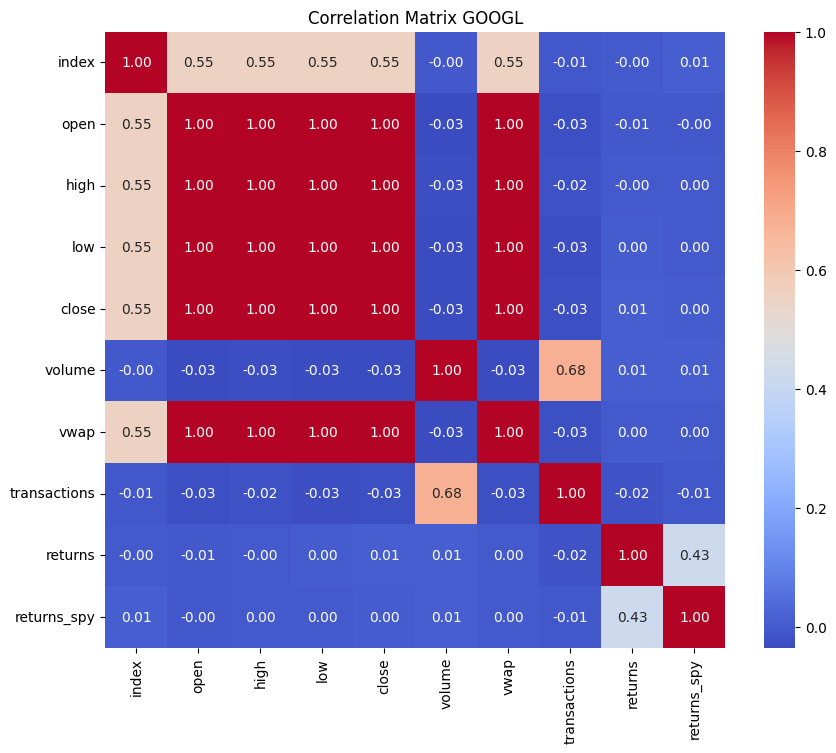

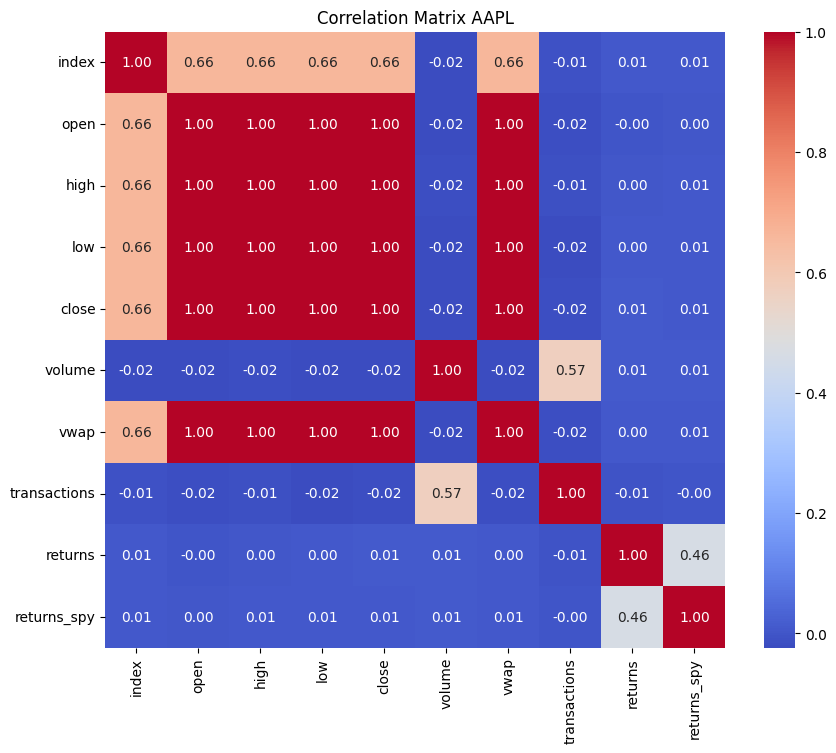

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

nvda_with_spy_returns = nvda.join(spy['returns'], rsuffix='_spy')
googl_with_spy_returns = googl.join(spy['returns'], rsuffix='_spy')
aapl_with_spy_returns = aapl.join(spy['returns'], rsuffix='_spy')

correlation_matrix_nvda = nvda_with_spy_returns.corr()
correlation_matrix_googl = googl_with_spy_returns.corr()
correlation_matrix_aapl = aapl_with_spy_returns.corr()


plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_nvda, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix NVDA')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_googl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix GOOGL')
plt.show()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix_aapl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix AAPL')
plt.show()

In [ ]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
symbols = df['Symbol'].tolist()

import yfinance as yf

# Fetch data
data = yf.download(symbols, period="1d")  # This fetches data for all symbols, might take time

# Get market cap using info method (for individual tickers)
market_caps = {}
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    try:
        market_caps[symbol] = ticker.info['marketCap']
    except:
        market_caps[symbol] = None

market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Symbol', 'MarketCap'])

# Drop rows with None values if any
market_caps_df.dropna(inplace=True)

# Sort by MarketCap
market_caps_df.sort_values(by='MarketCap', ascending=False, inplace=True)

# Select top 10 and bottom 10
top_10 = market_caps_df.head(10)
bottom_20 = market_caps_df.tail(20)

print("Top 10 S&P 500 Companies by Market Cap:")
print(top_10)

print("\nBottom 20 S&P 500 Companies by Market Cap:")
print(bottom_20)

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: Exception("%ticker%: Period '1d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


# Test Attempt

Maginificent 7: AAPL, MSFT, GOOG, AMZN, NVDA, TSLA, META

Bottom 20 (In order 481 -> 500): ETSY, RHI, CHRW, FRT, NCLH, PNW, MKTX, FMC, MHK, PARA, BWA, IVZ, HAS, GNRC, CMA, XRAY, ZION, VFC, WHR, DOC

## Aggregating Top 7 with Etsy

In [12]:
etsy = pd.read_csv('Data/Bottom_20/ETSY_Data.csv').drop(['otc'], axis=1)
etsy['timestamp'] = pd.to_datetime(etsy['timestamp'])
etsy['returns'] = (etsy['close'] / etsy['open'] - 1) * 100
etsy.head()

,timestamp,open,high,low,close,volume,vwap,transactions,returns
0,2023-09-01 11:08:00,74.00,74.00,74.00,74.00,650.0,74.0000,3,0.0
1,2023-09-01 12:00:00,74.10,74.10,74.10,74.10,901.0,74.0817,13,0.0
2,2023-09-01 12:03:00,73.90,73.90,73.90,73.90,113.0,73.9000,1,0.0
3,2023-09-01 12:37:00,74.50,74.50,74.50,74.50,201.0,74.4949,7,0.0
4,2023-09-01 12:39:00,74.75,74.75,74.75,74.75,1020.0,74.7437,3,0.0


In [13]:
dataframes = [googl, nvda, aapl, amzn, meta, msft, tsla]  # Your list of dataframes
company_names = ['Google', 'Nvidia', 'Apple', 'Amazon', 'Meta', 'MSFT', 'Tesla']  # Example names

# Rename 'return' column for clarity
for df, name in zip(dataframes, company_names):
    df.rename(columns={'volume': f'volume_{name}'}, inplace=True)

# Concatenate the return columns. Since the indexes are datetime and match, they should align automatically.
aggregated_volumes = pd.concat([df['volume_' + name] for df, name in zip(dataframes, company_names)], axis=1)
etsy.set_index('timestamp', inplace=True)

# If the indexes are not perfectly aligned or if you want to ensure the order, you can sort it (usually not necessary if timestamps are already the index and aligned)
aggregated_volumes = aggregated_volumes.sort_index()
df_merged = pd.merge(aggregated_volumes, etsy, left_index=True, right_index=True, how='outer')
df_merged

,volume_Google,volume_Nvidia,volume_Apple,volume_Amazon,volume_Meta,volume_MSFT,volume_Tesla,open,high,low,close,volume,vwap,transactions,returns
timestamp,,,,,,,,,,,,,,,
2023-09-01 08:00:00,494.0,2503.0,NaN,NaN,122.0,NaN,20317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:01:00,100.0,1323.0,NaN,600.0,157.0,NaN,27843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:02:00,NaN,409.0,NaN,4330.0,511.0,NaN,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:03:00,NaN,521.0,NaN,NaN,123.0,NaN,5613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:04:00,NaN,NaN,863.0,NaN,NaN,NaN,2338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02 00:55:00,1362.0,1398.0,13789.0,10061.0,10510.0,1703.0,9520.0,74.25,74.25,74.25,74.25,501.0,74.2573,10.0,0.0
2024-02-02 00:56:00,1882.0,2388.0,9226.0,26328.0,11417.0,809.0,5770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-02 00:57:00,546.0,5316.0,17623.0,70015.0,8662.0,NaN,3196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### How to Splice
Our different options to handle the disproportionate amount of data that is seen in each splice.
1. Ignore missing data: Ignore the data that doesn't fit into a complete splice, or just drop columns that have missing values. Edit: This is not a desirable method because gaps in time series data may indicate some sort of importance that we are unable to observe directly.
2. Forward Fill: Fill missing minutes by propagating the last valid observation forward. For example, if 10:02 is missing, use the value from 10:01 for 10:02. This method might introduce bias.
3. Dynamic Splice Adjustment: Instead of adjusting the size of the last splice, dynamically adjust splices to skip over gaps. This could mean each splice still aims for a fixed number of valid data points rather than adhering to a strict time window.
Application: Ensure each splice contains a consistent number of non-missing data points, adjusting the start and end times as necessary to accommodate gaps.
Consideration: This approach keeps the analysis on a consistent basis in terms of data points but could lead to variable time ranges being covered by each splice, which may affect temporal analysis.

#### Method 1: Ignore missing data

In [14]:
df_cleaned_google = df_merged.dropna(subset=['volume', 'volume_Google','volume_Nvidia', 'volume_Apple', 'volume_Amazon',
       'volume_Meta', 'volume_MSFT', 'volume_Tesla'], how='any')
points_per_slice = 240  # 4 hours of data

slices = []  # To store the slices
temp_slice = []  # Temporary storage for the current slice

for timestamp, row in df_cleaned_google.iterrows():
    if not pd.isna(row['volume']):
        temp_slice.append(row)
        if len(temp_slice) == points_per_slice:
            slices.append(pd.DataFrame(temp_slice))
            temp_slice = []

# If the last slice has fewer than the desired number of points and you want to keep it:
if temp_slice:
    slices.append(pd.DataFrame(temp_slice))

#### Using SARIMAX while ignoring missing data (not preferable)

In [139]:
train_slices = []
test_slices = []
for i in slices:
    train_slices.append(i[:180])
    test_slices.append(i[180:])

#arimax with google and etsy
from statsmodels.tsa.statespace.sarimax import SARIMAX
fitted_models = []
forecasts = []
# Assuming df_slice is your DataFrame containing the target and exogenous series
for df_slice in train_slices:
    y_train = df_slice['volume']  # Target variable: Etsy's volume
    X_train = df_slice[['volume_Google','volume_Nvidia', 'volume_Apple', 'volume_Amazon',
       'volume_Meta', 'volume_MSFT', 'volume_Tesla']]  # Exogenous variable: Google's volume as a DataFrame


    model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), suppress_warnings=True, error_action="ignore")
    result = model.fit()
    fitted_models.append(result)

# Forecasting with ARIMAX requires future values of the exogenous variables.
# For a one-step-ahead forecast, you can use the last known value(s) of the exogenous variable(s).
# For example:
    last_known_exog = X_train.iloc[[-1]]  # Using the last known exogenous value for one-step-ahead forecast
    forecast = result.forecast(steps=1, exog=last_known_exog)
    forecasts.append(forecast)


from sklearn.metrics import mean_squared_error
import numpy as np

num_slices_with_actual_data = len(test_slices) - 1  # Assuming test_slices is defined and aligned with forecasts

rmse_values = []

for i in range(num_slices_with_actual_data):
    forecast = forecasts[i]
    actual_value = test_slices[i]['volume'].iloc[0]  # Assuming one-step forecast for simplicity
    
    # Calculating RMSE for this slice's forecast
    rmse = np.sqrt(mean_squared_error([actual_value], [forecast.values[0]]))
    rmse_values.append(rmse)

    # Print the RMSE for this slice's forecast
    print(f"Slice {i+1} RMSE: {rmse}")

# Calculate and print the average RMSE across all slices with actual data
average_rmse = np.mean(rmse_values)
print(f"Average RMSE: {average_rmse}")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['suppress_warnings', 'error_action']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48936D+00    |proj g|=  1.21758D+00

At iterate    5    f=  9.47634D+00    |proj g|=  9.65273D-02

At iterate   10    f=  9.47209D+00    |proj g|=  1.02434D-01

At iterate   15    f=  9.47165D+00    |proj g|=  3.46117D-02

At iterate   20    f=  9.46806D+00    |proj g|=  9.80623D-01

At iterate   25    f=  9.46535D+00    |proj g|=  6.94697D-02

At iterate   30    f=  9.46531D+00    |proj g|=  7.29187D-03

At iterate   35    f=  9.46531D+00    |proj g|=  7.14013D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   50    f=  9.68251D+00    |proj g|=  3.97719D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   3.977D-01   9.683D+00
  F =   9.6825125624586228     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45798D+00    |proj g|=  8.96982D-01

At iterate    5    f=  9.45280D+00    |proj g|=  4.74714D-01

At iterate   10    f=  9.45065D+00    |proj g|=  2.78520D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._


At iterate   25    f=  1.00209D+01    |proj g|=  6.21205D-01

At iterate   30    f=  1.00141D+01    |proj g|=  1.57028D-01

At iterate   35    f=  1.00124D+01    |proj g|=  3.99374D-02

At iterate   40    f=  1.00122D+01    |proj g|=  3.98607D-03

At iterate   45    f=  1.00122D+01    |proj g|=  4.28238D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     49      1     0     0   4.282D-04   1.001D+01
  F =   10.012179558103711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  9.82028D+00    |proj g|=  5.76945D-02

At iterate   15    f=  9.81799D+00    |proj g|=  9.44596D-02

At iterate   20    f=  9.81327D+00    |proj g|=  1.04552D-02

At iterate   25    f=  9.81324D+00    |proj g|=  7.42024D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     34      1     0     0   5.007D-05   9.813D+00
  F =   9.8132408298018206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  9.69482D+00    |proj g|=  1.35024D-01

At iterate   10    f=  9.68484D+00    |proj g|=  7.25592D-02

At iterate   15    f=  9.68475D+00    |proj g|=  2.54791D-02

At iterate   20    f=  9.68473D+00    |proj g|=  7.46791D-03

At iterate   25    f=  9.68469D+00    |proj g|=  3.63688D-02

At iterate   30    f=  9.68442D+00    |proj g|=  1.36132D-01

At iterate   35    f=  9.68387D+00    |proj g|=  1.12246D-01

At iterate   40    f=  9.68379D+00    |proj g|=  1.40421D-02

At iterate   45    f=  9.68379D+00    |proj g|=  1.94131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in


At iterate   35    f=  1.00315D+01    |proj g|=  5.73529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     45      1     0     0   9.129D-05   1.003D+01
  F =   10.031503764383373     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04049D+01    |proj g|=  1.88163D+00

At iterate    5    f=  1.03971D+01    |proj g|=  3.35767D-01

At iterate   10    f=  1.03926D+01    |proj g|=  1.47552D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   15    f=  9.41942D+00    |proj g|=  1.50054D-01

At iterate   20    f=  9.41828D+00    |proj g|=  5.22818D-02

At iterate   25    f=  9.41792D+00    |proj g|=  4.53130D-02

At iterate   30    f=  9.41768D+00    |proj g|=  2.38257D-01

At iterate   35    f=  9.41312D+00    |proj g|=  3.25852D+00

At iterate   40    f=  9.40787D+00    |proj g|=  6.75087D-02

At iterate   45    f=  9.40752D+00    |proj g|=  1.79424D-02

At iterate   50    f=  9.40752D+00    |proj g|=  7.94351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   7.944D-04   9.408D+00
  F =   9.40751630578

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   25    f=  1.12601D+01    |proj g|=  1.07584D-02

At iterate   30    f=  1.12599D+01    |proj g|=  1.47159D-02

At iterate   35    f=  1.12586D+01    |proj g|=  1.21200D-01

At iterate   40    f=  1.12573D+01    |proj g|=  2.86133D-02

At iterate   45    f=  1.12569D+01    |proj g|=  3.41149D-02

At iterate   50    f=  1.12567D+01    |proj g|=  1.57586D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   1.576D-02   1.126D+01
  F =   11.256703760357421     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   15    f=  1.11782D+01    |proj g|=  6.07647D-02

At iterate   20    f=  1.11674D+01    |proj g|=  9.32177D-02

At iterate   25    f=  1.11654D+01    |proj g|=  7.00190D-02

At iterate   30    f=  1.11636D+01    |proj g|=  1.46734D-01

At iterate   35    f=  1.11625D+01    |proj g|=  1.28049D-01

At iterate   40    f=  1.11620D+01    |proj g|=  2.02306D-02

At iterate   45    f=  1.11620D+01    |proj g|=  3.88750D-03

At iterate   50    f=  1.11620D+01    |proj g|=  5.72420D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     59      1     0     0   5.724D-04   1.116D+01
  F =   11.1619841894

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   35    f=  9.67845D+00    |proj g|=  5.36363D-01

At iterate   40    f=  9.67421D+00    |proj g|=  6.45373D-01

At iterate   45    f=  9.67051D+00    |proj g|=  1.27812D-01

At iterate   50    f=  9.66876D+00    |proj g|=  1.96367D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54      1     0     0   1.964D-02   9.669D+00
  F =   9.6687607415728465     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52539D+00    |proj g|=  6.48213D-01

At iterate    5    f=  9.52199D+00    |proj g|=  2.56237D-01

At iterate   10    f=  9.51855D+00    |proj g|=  2.37893D-01

At iterate   15    f=  9.51405D+00    |proj g|=  2.76215D-01

At iterate   20    f=  9.51093D+00    |proj g|=  4.77187D-02

At iterate   25    f=  9.50898D+00    |proj g|=  5.64043D-01

At iterate   30    f=  9.49462D+00    |proj g|=  5.36197D-01

At iterate   35    f=  9.48904D+00    |proj g|=  1.52768D-01

At iterate   40    f=  9.48678D+00    |proj g|=  1.38956D-01

At iterate   45    f=  9.48604D+00    |proj g|=  6.44512D-02

At iterate   50    f=  9.48601D+00    |proj g|=  2.63253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate   10    f=  9.97988D+00    |proj g|=  6.01850D-02

At iterate   15    f=  9.97977D+00    |proj g|=  5.58894D-02

At iterate   20    f=  9.97792D+00    |proj g|=  1.09453D-01

At iterate   25    f=  9.97549D+00    |proj g|=  3.94834D-02

At iterate   30    f=  9.97548D+00    |proj g|=  1.13274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     31     36      1     0     0   7.423D-04   9.975D+00
  F =   9.9754823423229553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  9.66177D+00    |proj g|=  1.32084D-01

At iterate   15    f=  9.65804D+00    |proj g|=  8.66707D-02

At iterate   20    f=  9.65689D+00    |proj g|=  1.59413D-01

At iterate   25    f=  9.65398D+00    |proj g|=  4.51931D-01

At iterate   30    f=  9.64917D+00    |proj g|=  3.35229D-01

At iterate   35    f=  9.64541D+00    |proj g|=  4.33296D-01

At iterate   40    f=  9.63797D+00    |proj g|=  3.07919D-01

At iterate   45    f=  9.62880D+00    |proj g|=  1.68157D-01

At iterate   50    f=  9.62369D+00    |proj g|=  2.57761D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   15    f=  1.00892D+01    |proj g|=  8.27762D-03

At iterate   20    f=  1.00892D+01    |proj g|=  3.57523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     25      1     0     0   2.343D-04   1.009D+01
  F =   10.089203855001569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00352D+01    |proj g|=  3.13284D-01

At iterate    5    f=  1.00284D+01    |proj g|=  1.18168D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   40    f=  1.02358D+01    |proj g|=  4.40106D-02

At iterate   45    f=  1.02358D+01    |proj g|=  1.44332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     47     53      1     0     0   1.769D-04   1.024D+01
  F =   10.235802814353519     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.34620D+00    |proj g|=  1.57874D+00

At iterate    5    f=  9.34236D+00    |proj g|=  9.23169D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in


At iterate   25    f=  1.01424D+01    |proj g|=  7.55164D-02

At iterate   30    f=  1.01408D+01    |proj g|=  2.88999D-02

At iterate   35    f=  1.01407D+01    |proj g|=  7.94463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     45      1     0     0   9.838D-04   1.014D+01
  F =   10.140733155833361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07356D+01    |proj g|=  9.99476D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate    5    f=  1.07413D+01    |proj g|=  2.18299D-01

At iterate   10    f=  1.07348D+01    |proj g|=  1.24819D-01

At iterate   15    f=  1.07338D+01    |proj g|=  7.57705D-02

At iterate   20    f=  1.07303D+01    |proj g|=  2.36856D-01

At iterate   25    f=  1.07296D+01    |proj g|=  5.18384D-02

At iterate   30    f=  1.07295D+01    |proj g|=  4.42959D-03

At iterate   35    f=  1.07295D+01    |proj g|=  2.80018D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     42      1     0     0   4.611D-04   1.073D+01
  F =   10.729527851933476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   30    f=  9.49963D+00    |proj g|=  1.78832D-01

At iterate   35    f=  9.49592D+00    |proj g|=  4.63060D-01

At iterate   40    f=  9.49399D+00    |proj g|=  5.42076D-02

At iterate   45    f=  9.49369D+00    |proj g|=  9.90536D-03

At iterate   50    f=  9.49368D+00    |proj g|=  5.98229D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   5.982D-03   9.494D+00
  F =   9.4936793115735707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate    0    f=  9.53874D+00    |proj g|=  1.81338D+00

At iterate    5    f=  9.52996D+00    |proj g|=  1.46386D-01

At iterate   10    f=  9.52144D+00    |proj g|=  1.94227D-01

At iterate   15    f=  9.51511D+00    |proj g|=  1.08914D-01

At iterate   20    f=  9.51431D+00    |proj g|=  7.05159D-02

At iterate   25    f=  9.51033D+00    |proj g|=  7.12310D-01

At iterate   30    f=  9.49266D+00    |proj g|=  3.84930D-01

At iterate   35    f=  9.48219D+00    |proj g|=  8.01316D-02

At iterate   40    f=  9.48130D+00    |proj g|=  1.86180D-02

At iterate   45    f=  9.48128D+00    |proj g|=  3.94713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate    5    f=  9.95645D+00    |proj g|=  7.66837D-02

At iterate   10    f=  9.95213D+00    |proj g|=  1.67602D-01

At iterate   15    f=  9.95096D+00    |proj g|=  1.06161D-02

At iterate   20    f=  9.95085D+00    |proj g|=  5.86494D-02

At iterate   25    f=  9.94596D+00    |proj g|=  9.78710D-01

At iterate   30    f=  9.94085D+00    |proj g|=  1.90465D-01

At iterate   35    f=  9.93733D+00    |proj g|=  9.27430D-02

At iterate   40    f=  9.93523D+00    |proj g|=  5.86128D-02

At iterate   45    f=  9.93479D+00    |proj g|=  4.72099D-02

At iterate   50    f=  9.93475D+00    |proj g|=  9.48385D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01210D+01    |proj g|=  8.10483D-01

At iterate    5    f=  1.01161D+01    |proj g|=  8.29041D-02

At iterate   10    f=  1.01141D+01    |proj g|=  1.90056D-01

At iterate   15    f=  1.01136D+01    |proj g|=  8.70690D-03

At iterate   20    f=  1.01136D+01    |proj g|=  1.13516D-02

At iterate   25    f=  1.01134D+01    |proj g|=  1.10248D-01

At iterate   30    f=  1.01126D+01    |proj g|=  6.07394D-02

At iterate   35    f=  1.01123D+01    |proj g|=  1.02606D-01

At iterate   40    f=  1.01118D+01    |proj g|=  2.66525D-02

At iterate   45    f=  1.01117D+01    |proj g|=  5.12643D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     56      1     0     0   1.173D-03   9.395D+00
  F =   9.3954129504642552     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69725D+00    |proj g|=  7.06200D-01

At iterate    5    f=  9.69046D+00    |proj g|=  5.33572D-02

At iterate   10    f=  9.69029D+00    |proj g|=  2.58790D-02

At iterate   15    f=  9.69010D+00    |proj g|=  1.62851D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     47      1     0     0   9.768D-04   9.886D+00
  F =   9.8856100942711738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78753D+00    |proj g|=  1.49558D-01

At iterate    5    f=  9.78451D+00    |proj g|=  2.48972D-01

At iterate   10    f=  9.77189D+00    |proj g|=  8.75213D-02

At iterate   15    f=  9.77142D+00    |proj g|=  6.44852D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   20    f=  9.94125D+00    |proj g|=  2.48900D-02

At iterate   25    f=  9.94120D+00    |proj g|=  2.09636D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     30      1     0     0   2.096D-03   9.941D+00
  F =   9.9412032217510848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02128D+01    |proj g|=  7.07447D-01

At iterate    5    f=  1.01957D+01    |proj g|=  9.60950D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate   10    f=  9.56398D+00    |proj g|=  6.25990D-02

At iterate   15    f=  9.56317D+00    |proj g|=  3.18277D-02

At iterate   20    f=  9.55844D+00    |proj g|=  2.41235D-01

At iterate   25    f=  9.55166D+00    |proj g|=  3.36124D-02

At iterate   30    f=  9.55164D+00    |proj g|=  4.80169D-03

At iterate   35    f=  9.55162D+00    |proj g|=  5.35938D-03

At iterate   40    f=  9.55162D+00    |proj g|=  1.43740D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     52      1     0     0   5.197D-04   9.552D+00
  F =   9.5516193291981324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   45    f=  1.05112D+01    |proj g|=  3.62956D-02

At iterate   50    f=  1.05112D+01    |proj g|=  2.69839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   2.698D-03   1.051D+01
  F =   10.511230356480928     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57586D+00    |proj g|=  3.72066D-01

At iterate    5    f=  9.57020D+00    |proj g|=  2.45667D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in


At iterate   20    f=  1.01939D+01    |proj g|=  4.71398D-02

At iterate   25    f=  1.01843D+01    |proj g|=  2.23121D-01

At iterate   30    f=  1.01768D+01    |proj g|=  2.30888D-01

At iterate   35    f=  1.01751D+01    |proj g|=  1.90444D-01

At iterate   40    f=  1.01750D+01    |proj g|=  4.09039D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     51      1     0     0   6.498D-04   1.018D+01
  F =   10.175019897146536     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   20    f=  9.81295D+00    |proj g|=  8.05595D-01

At iterate   25    f=  9.80727D+00    |proj g|=  6.31113D-02

At iterate   30    f=  9.80529D+00    |proj g|=  3.38328D-02

At iterate   35    f=  9.80511D+00    |proj g|=  2.12229D-02

At iterate   40    f=  9.80510D+00    |proj g|=  6.33629D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     47      1     0     0   6.641D-04   9.805D+00
  F =   9.8051031811160261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate    5    f=  9.60887D+00    |proj g|=  2.99975D-01

At iterate   10    f=  9.59796D+00    |proj g|=  6.66166D-02

At iterate   15    f=  9.58983D+00    |proj g|=  6.85743D-01

At iterate   20    f=  9.56566D+00    |proj g|=  3.59345D-02

At iterate   25    f=  9.56561D+00    |proj g|=  1.93090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     36      1     0     0   1.749D-03   9.566D+00
  F =   9.5656112245350418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate    5    f=  1.02405D+01    |proj g|=  4.22228D-01

At iterate   10    f=  1.02372D+01    |proj g|=  3.20528D-01

At iterate   15    f=  1.02280D+01    |proj g|=  5.78256D-02

At iterate   20    f=  1.02278D+01    |proj g|=  7.70995D-02

At iterate   25    f=  1.02241D+01    |proj g|=  7.14818D-01

At iterate   30    f=  1.02156D+01    |proj g|=  1.13106D-01

At iterate   35    f=  1.02140D+01    |proj g|=  4.12965D-02

At iterate   40    f=  1.02136D+01    |proj g|=  3.38088D-01

At iterate   45    f=  1.02129D+01    |proj g|=  1.96319D-01

At iterate   50    f=  1.02128D+01    |proj g|=  4.22953D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._


At iterate   20    f=  1.02980D+01    |proj g|=  4.64823D-01

At iterate   25    f=  1.02806D+01    |proj g|=  2.90692D-02

At iterate   30    f=  1.02803D+01    |proj g|=  3.88238D-02

At iterate   35    f=  1.02803D+01    |proj g|=  2.28554D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37     42      1     0     0   3.021D-04   1.028D+01
  F =   10.280251732986596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Fram

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05390D+01    |proj g|=  1.85182D+00

At iterate    5    f=  1.05272D+01    |proj g|=  8.05634D-02

At iterate   10    f=  1.05242D+01    |proj g|=  3.87817D-02

At iterate   15    f=  1.05238D+01    |proj g|=  5.47574D-02

At iterate   20    f=  1.05235D+01    |proj g|=  1.85241D-02

At iterate   25    f=  1.05227D+01    |proj g|=  2.90122D-01

At iterate   30    f=  1.05219D+01    |proj g|=  9.68030D-03

At iterate   35    f=  1.05219D+01    |proj g|=  9.16886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   15    f=  1.16125D+01    |proj g|=  1.47209D-02

At iterate   20    f=  1.16110D+01    |proj g|=  7.46675D-03

At iterate   25    f=  1.16110D+01    |proj g|=  5.18550D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     32      1     0     0   9.735D-05   1.161D+01
  F =   11.610972217628992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07872D+01    |proj g|=  5.69426D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   10    f=  1.00505D+01    |proj g|=  1.45784D-01

At iterate   15    f=  1.00179D+01    |proj g|=  4.51344D-01

At iterate   20    f=  9.99848D+00    |proj g|=  2.12503D-02

At iterate   25    f=  9.99766D+00    |proj g|=  5.04237D-02

At iterate   30    f=  9.99751D+00    |proj g|=  9.97946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     32     37      1     0     0   4.115D-04   9.998D+00
  F =   9.9975102626006063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.40592D+00    |proj g|=  8.50603D-01

At iterate    5    f=  9.39614D+00    |proj g|=  3.45176D-01

At iterate   10    f=  9.38963D+00    |proj g|=  8.38756D-02

At iterate   15    f=  9.38549D+00    |proj g|=  4.02058D-01

At iterate   20    f=  9.38392D+00    |proj g|=  1.06450D-01

At iterate   25    f=  9.38352D+00    |proj g|=  1.87868D-01

At iterate   30    f=  9.37602D+00    |proj g|=  6.55153D-01

At iterate   35    f=  9.37225D+00    |proj g|=  2.70232D-01

At iterate   40    f=  9.37133D+00    |proj g|=  8.22901D-02

At iterate   45    f=  9.37087D+00    |proj g|=  1.52473D-02

At iterate   50    f=  9.37084D+00    |proj g|=  4.55856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   45    f=  1.05818D+01    |proj g|=  1.33815D-02

At iterate   50    f=  1.05817D+01    |proj g|=  3.90020D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   3.900D-03   1.058D+01
  F =   10.581736732513559     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01802D+01    |proj g|=  3.02723D-01

At iterate    5    f=  1.01693D+01    |proj g|=  1.60170D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   20    f=  1.02314D+01    |proj g|=  4.53723D-01

At iterate   25    f=  1.02306D+01    |proj g|=  1.91961D-01

At iterate   30    f=  1.02269D+01    |proj g|=  1.89660D-01

At iterate   35    f=  1.02173D+01    |proj g|=  4.17226D-01

At iterate   40    f=  1.02117D+01    |proj g|=  2.16687D-01

At iterate   45    f=  1.02049D+01    |proj g|=  8.07518D-02

At iterate   50    f=  1.02019D+01    |proj g|=  1.36391D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   1.364D-01   1.020D+01
  F =   10.201895396427886     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.55971D+00    |proj g|=  1.07418D+00

At iterate    5    f=  9.55485D+00    |proj g|=  4.36934D-01

At iterate   10    f=  9.54601D+00    |proj g|=  3.77736D-01

At iterate   15    f=  9.53674D+00    |proj g|=  2.75467D-01

At iterate   20    f=  9.53345D+00    |proj g|=  4.04512D-02

At iterate   25    f=  9.53295D+00    |proj g|=  1.20980D-01

At iterate   30    f=  9.53104D+00    |proj g|=  6.94598D-01

At iterate   35    f=  9.52455D+00    |proj g|=  8.86692D-02

At iterate   40    f=  9.52305D+00    |proj g|=  1.15870D-01

At iterate   45    f=  9.52123D+00    |proj g|=  8.20806D-02

At iterate   50    f=  9.51947D+00    |proj g|=  1.23186D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   15    f=  9.64383D+00    |proj g|=  8.71166D-02

At iterate   20    f=  9.63187D+00    |proj g|=  7.56751D-01

At iterate   25    f=  9.59877D+00    |proj g|=  1.35293D-01

At iterate   30    f=  9.59822D+00    |proj g|=  8.03778D-02

At iterate   35    f=  9.59812D+00    |proj g|=  4.65685D-03

At iterate   40    f=  9.59812D+00    |proj g|=  1.79859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     48      1     0     0   1.023D-03   9.598D+00
  F =   9.5981173699414448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  1.02270D+01    |proj g|=  8.06314D-01

At iterate   10    f=  1.02212D+01    |proj g|=  3.78185D-01

At iterate   15    f=  1.02203D+01    |proj g|=  4.29925D-01

At iterate   20    f=  1.02196D+01    |proj g|=  1.47924D-01

At iterate   25    f=  1.02185D+01    |proj g|=  4.92062D-02

At iterate   30    f=  1.02183D+01    |proj g|=  1.89351D-02

At iterate   35    f=  1.02183D+01    |proj g|=  1.98717D-02

At iterate   40    f=  1.02183D+01    |proj g|=  9.17691D-03

At iterate   45    f=  1.02182D+01    |proj g|=  4.07973D-02

At iterate   50    f=  1.02182D+01    |proj g|=  5.23405D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   30    f=  9.62810D+00    |proj g|=  3.33344D-02

At iterate   35    f=  9.62810D+00    |proj g|=  8.98230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     41      1     0     0   7.026D-04   9.628D+00
  F =   9.6280961889921297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05943D+01    |proj g|=  4.91994D-01

At iterate    5    f=  1.05852D+01    |proj g|=  1.84575D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   15    f=  1.03946D+01    |proj g|=  2.54463D-02

At iterate   20    f=  1.03904D+01    |proj g|=  2.21698D-01

At iterate   25    f=  1.03741D+01    |proj g|=  3.17631D-01

At iterate   30    f=  1.03719D+01    |proj g|=  1.02563D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     38      1     0     0   8.556D-04   1.037D+01
  F =   10.371790229958194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate    5    f=  1.05766D+01    |proj g|=  1.65102D-01

At iterate   10    f=  1.05752D+01    |proj g|=  1.12389D-01

At iterate   15    f=  1.05750D+01    |proj g|=  4.16573D-02

At iterate   20    f=  1.05749D+01    |proj g|=  8.04706D-02

At iterate   25    f=  1.05749D+01    |proj g|=  1.07636D-01

At iterate   30    f=  1.05747D+01    |proj g|=  8.70680D-02

At iterate   35    f=  1.05738D+01    |proj g|=  2.04841D-01

At iterate   40    f=  1.05725D+01    |proj g|=  1.69632D-01

At iterate   45    f=  1.05722D+01    |proj g|=  1.37422D-02

At iterate   50    f=  1.05721D+01    |proj g|=  1.15937D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in


At iterate    5    f=  1.05752D+01    |proj g|=  3.53746D-02

At iterate   10    f=  1.05745D+01    |proj g|=  3.18890D-02

At iterate   15    f=  1.05538D+01    |proj g|=  5.46904D-02

At iterate   20    f=  1.05460D+01    |proj g|=  5.29247D-02

At iterate   25    f=  1.05437D+01    |proj g|=  7.10619D-03

At iterate   30    f=  1.05435D+01    |proj g|=  7.23390D-02

At iterate   35    f=  1.05431D+01    |proj g|=  1.24206D-02

At iterate   40    f=  1.05431D+01    |proj g|=  1.29488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     52      1     0     0   6.291D-04   1.054D+01
  F =   10.5430739231

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   35    f=  9.67634D+00    |proj g|=  9.34349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     41      1     0     0   9.343D-04   9.676D+00
  F =   9.6763442746512265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.17365D+00    |proj g|=  9.63395D-01

At iterate    5    f=  9.17082D+00    |proj g|=  1.47330D-01

At iterate   10    f=  9.16294D+00    |proj g|=  2.93694D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   15    f=  9.29179D+00    |proj g|=  1.83673D-01

At iterate   20    f=  9.29051D+00    |proj g|=  9.16099D-02

At iterate   25    f=  9.29009D+00    |proj g|=  3.22919D-01

At iterate   30    f=  9.27701D+00    |proj g|=  8.10091D-01

At iterate   35    f=  9.26940D+00    |proj g|=  1.91110D-01

At iterate   40    f=  9.26878D+00    |proj g|=  2.79377D-01

At iterate   45    f=  9.26859D+00    |proj g|=  7.20362D-02

At iterate   50    f=  9.26855D+00    |proj g|=  7.73713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   7.737D-03   9.269D+00
  F =   9.26855224094

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   20    f=  1.02532D+01    |proj g|=  1.78522D-01

At iterate   25    f=  1.02436D+01    |proj g|=  2.06616D-01

At iterate   30    f=  1.02384D+01    |proj g|=  1.49940D-01

At iterate   35    f=  1.02382D+01    |proj g|=  3.33452D-02

At iterate   40    f=  1.02381D+01    |proj g|=  1.06368D-02

At iterate   45    f=  1.02381D+01    |proj g|=  3.13987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     52      1     0     0   3.140D-04   1.024D+01
  F =   10.238096162695742     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     73      1     0     0   1.253D-03   9.356D+00
  F =   9.3563359681646645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02595D+01    |proj g|=  8.64270D-01

At iterate    5    f=  1.02488D+01    |proj g|=  1.18765D-01

At iterate   10    f=  1.02447D+01    |proj g|=  1.16812D-01

At iterate   15    f=  1.02439D+01    |proj g|=  1.18030D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63890D+00    |proj g|=  1.35853D+00

At iterate    5    f=  9.62759D+00    |proj g|=  4.34475D-01

At iterate   10    f=  9.62227D+00    |proj g|=  1.47510D-01

At iterate   15    f=  9.61575D+00    |proj g|=  5.04197D-02

At iterate   20    f=  9.61391D+00    |proj g|=  3.68816D-01

At iterate   25    f=  9.59669D+00    |proj g|=  4.95648D-01

At iterate   30    f=  9.59168D+00    |proj g|=  1.82973D-01

At iterate   35    f=  9.58846D+00    |proj g|=  4.71392D-02

At iterate   40    f=  9.58826D+00    |proj g|=  9.15775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   40    f=  1.03582D+01    |proj g|=  1.11776D-01

At iterate   45    f=  1.03570D+01    |proj g|=  9.06984D-02

At iterate   50    f=  1.03564D+01    |proj g|=  3.96014D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   3.960D-02   1.036D+01
  F =   10.356375981485014     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03299D+01    |proj g|=  2.41940D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   25    f=  1.11214D+01    |proj g|=  2.00446D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     31      1     0     0   7.304D-05   1.112D+01
  F =   11.121419380535920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12895D+01    |proj g|=  2.30823D-01

At iterate    5    f=  1.12794D+01    |proj g|=  9.52278D-02

At iterate   10    f=  1.12659D+01    |proj g|=  7.13866D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   30    f=  9.21271D+00    |proj g|=  7.39368D-01

At iterate   35    f=  9.20564D+00    |proj g|=  1.49957D-01

At iterate   40    f=  9.20063D+00    |proj g|=  7.87360D-01

At iterate   45    f=  9.19694D+00    |proj g|=  8.48672D-02

At iterate   50    f=  9.19692D+00    |proj g|=  1.06205D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   1.062D-02   9.197D+00
  F =   9.1969241634198493     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   15    f=  9.73635D+00    |proj g|=  9.92839D-02

At iterate   20    f=  9.73618D+00    |proj g|=  1.84759D-01

At iterate   25    f=  9.73613D+00    |proj g|=  6.60642D-02

At iterate   30    f=  9.73612D+00    |proj g|=  2.48688D-02

At iterate   35    f=  9.73611D+00    |proj g|=  1.63827D-02

At iterate   40    f=  9.73611D+00    |proj g|=  9.14122D-03

At iterate   45    f=  9.73607D+00    |proj g|=  2.08326D-01

At iterate   50    f=  9.73489D+00    |proj g|=  5.26502D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     53      1     0     0   5.265D-01   9.735D+00
  F =   9.73488538842

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   10    f=  1.14106D+01    |proj g|=  7.80515D-03

At iterate   15    f=  1.14099D+01    |proj g|=  2.60859D-02

At iterate   20    f=  1.14098D+01    |proj g|=  1.57551D-02

At iterate   25    f=  1.14098D+01    |proj g|=  1.63292D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     31      1     0     0   3.538D-04   1.141D+01
  F =   11.409829282702926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("


At iterate   15    f=  1.16175D+01    |proj g|=  3.90706D-02

At iterate   20    f=  1.16144D+01    |proj g|=  3.81650D-02

At iterate   25    f=  1.16133D+01    |proj g|=  3.27546D-02

At iterate   30    f=  1.16131D+01    |proj g|=  4.81558D-03

At iterate   35    f=  1.16131D+01    |proj g|=  5.70133D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     41      1     0     0   5.701D-04   1.161D+01
  F =   11.613140148034667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   10    f=  1.17376D+01    |proj g|=  1.48628D-02

At iterate   15    f=  1.17375D+01    |proj g|=  5.53144D-04

At iterate   20    f=  1.17375D+01    |proj g|=  9.21917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     22     27      1     0     0   6.845D-05   1.174D+01
  F =   11.737540252898294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10932D+01    |proj g|=  7.57983D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   10    f=  9.84929D+00    |proj g|=  4.89810D-02

At iterate   15    f=  9.84844D+00    |proj g|=  2.10259D-01

At iterate   20    f=  9.84812D+00    |proj g|=  1.91903D-02

At iterate   25    f=  9.84781D+00    |proj g|=  2.24519D-01

At iterate   30    f=  9.84469D+00    |proj g|=  1.69571D-01

At iterate   35    f=  9.84422D+00    |proj g|=  1.36057D-02

At iterate   40    f=  9.84421D+00    |proj g|=  2.09484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     48      1     0     0   4.214D-04   9.844D+00
  F =   9.8442060054491360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   10    f=  1.05211D+01    |proj g|=  1.78711D-02

At iterate   15    f=  1.05171D+01    |proj g|=  1.49907D-01

At iterate   20    f=  1.05140D+01    |proj g|=  5.09241D-03

At iterate   25    f=  1.05140D+01    |proj g|=  9.53310D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     31      1     0     0   5.445D-05   1.051D+01
  F =   10.514019018804648     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T wi


At iterate   15    f=  1.25910D+01    |proj g|=  1.10654D-02

At iterate   20    f=  1.25855D+01    |proj g|=  2.67670D-02

At iterate   25    f=  1.25815D+01    |proj g|=  1.33152D-02

At iterate   30    f=  1.25809D+01    |proj g|=  2.13929D-03

At iterate   35    f=  1.25809D+01    |proj g|=  7.05376D-03

At iterate   40    f=  1.25808D+01    |proj g|=  1.35806D-03

At iterate   45    f=  1.25808D+01    |proj g|=  4.56269D-04

At iterate   50    f=  1.25808D+01    |proj g|=  1.33222D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   1.332D-04   1.258D+01
  F =   12.5808200197

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.12285D+00    |proj g|=  2.28162D+00

At iterate    5    f=  9.11122D+00    |proj g|=  3.10750D-01

At iterate   10    f=  9.10370D+00    |proj g|=  2.39187D-01

At iterate   15    f=  9.09380D+00    |proj g|=  5.98396D-02

At iterate   20    f=  9.09346D+00    |proj g|=  7.56815D-02

At iterate   25    f=  9.08613D+00    |proj g|=  3.61544D-01

At iterate   30    f=  9.08253D+00    |proj g|=  1.79832D-01

At iterate   35    f=  9.08223D+00    |proj g|=  2.11508D-02

At iterate   40    f=  9.08223D+00    |proj g|=  1.17249D-02

At iterate   45    f=  9.08222D+00    |proj g|=  1.38939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate    5    f=  9.72723D+00    |proj g|=  7.59295D-02

At iterate   10    f=  9.72683D+00    |proj g|=  3.43388D-02

At iterate   15    f=  9.72618D+00    |proj g|=  3.86938D-02

At iterate   20    f=  9.72616D+00    |proj g|=  1.23683D-02

At iterate   25    f=  9.72576D+00    |proj g|=  2.56347D-01

At iterate   30    f=  9.71893D+00    |proj g|=  5.11543D-01

At iterate   35    f=  9.71789D+00    |proj g|=  9.80988D-02

At iterate   40    f=  9.71511D+00    |proj g|=  2.92392D-01

At iterate   45    f=  9.71066D+00    |proj g|=  5.69761D-02

At iterate   50    f=  9.70966D+00    |proj g|=  1.14683D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  1.04352D+01    |proj g|=  2.64606D+00

At iterate   10    f=  9.98186D+00    |proj g|=  1.00361D+00

At iterate   15    f=  9.92720D+00    |proj g|=  4.74204D-01

At iterate   20    f=  9.92457D+00    |proj g|=  6.48215D-01

At iterate   25    f=  9.90250D+00    |proj g|=  9.34678D-01

At iterate   30    f=  9.87443D+00    |proj g|=  6.91949D-01

At iterate   35    f=  9.86805D+00    |proj g|=  7.94604D-02

At iterate   40    f=  9.86789D+00    |proj g|=  4.13991D-02

At iterate   45    f=  9.86783D+00    |proj g|=  4.77520D-03

At iterate   50    f=  9.86783D+00    |proj g|=  2.22539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign


At iterate    5    f=  1.01458D+01    |proj g|=  5.47075D-01

At iterate   10    f=  1.01445D+01    |proj g|=  4.81698D-01

At iterate   15    f=  1.01422D+01    |proj g|=  1.05405D-01

At iterate   20    f=  1.01402D+01    |proj g|=  5.78030D-02

At iterate   25    f=  1.01399D+01    |proj g|=  1.62686D-01

At iterate   30    f=  1.01398D+01    |proj g|=  8.81811D-02

At iterate   35    f=  1.01395D+01    |proj g|=  2.23534D-01

At iterate   40    f=  1.01381D+01    |proj g|=  1.32509D-01

At iterate   45    f=  1.01354D+01    |proj g|=  8.37355D-01

At iterate   50    f=  1.01342D+01    |proj g|=  5.62963D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   50    f=  9.65322D+00    |proj g|=  2.85488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   2.855D-02   9.653D+00
  F =   9.6532196950504936     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68162D+00    |proj g|=  2.48732D+00

At iterate    5    f=  9.66661D+00    |proj g|=  2.02498D-01

At iterate   10    f=  9.66495D+00    |proj g|=  1.40049D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   20    f=  9.54619D+00    |proj g|=  2.55020D-02

At iterate   25    f=  9.54585D+00    |proj g|=  1.00750D+00

At iterate   30    f=  9.54387D+00    |proj g|=  2.97025D-01

At iterate   35    f=  9.54376D+00    |proj g|=  1.71277D-01

At iterate   40    f=  9.54370D+00    |proj g|=  1.14433D-01

At iterate   45    f=  9.54360D+00    |proj g|=  1.42598D-01

At iterate   50    f=  9.54302D+00    |proj g|=  5.16919D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   5.169D-01   9.543D+00
  F =   9.5430154748291613     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   20    f=  1.01381D+01    |proj g|=  1.68087D-01

At iterate   25    f=  1.01378D+01    |proj g|=  6.85088D-02

At iterate   30    f=  1.01377D+01    |proj g|=  1.13144D-02

At iterate   35    f=  1.01376D+01    |proj g|=  1.32927D-02

At iterate   40    f=  1.01376D+01    |proj g|=  6.99860D-02

At iterate   45    f=  1.01373D+01    |proj g|=  5.33744D-02

At iterate   50    f=  1.01372D+01    |proj g|=  1.93172D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   1.932D-02   1.014D+01
  F =   10.137201959098062     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   15    f=  1.04921D+01    |proj g|=  7.83412D-02

At iterate   20    f=  1.04912D+01    |proj g|=  6.56452D-02

At iterate   25    f=  1.04834D+01    |proj g|=  1.79436D-01

At iterate   30    f=  1.04816D+01    |proj g|=  1.38987D-02

At iterate   35    f=  1.04815D+01    |proj g|=  2.52823D-03

At iterate   40    f=  1.04815D+01    |proj g|=  3.26333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     49      1     0     0   2.227D-04   1.048D+01
  F =   10.481461329955463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   50    f=  1.04647D+01    |proj g|=  5.71701D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   5.717D-02   1.046D+01
  F =   10.464723314190595     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02281D+01    |proj g|=  2.48256D-01

At iterate    5    f=  1.02227D+01    |proj g|=  2.33186D-01

At iterate   10    f=  1.02119D+01    |proj g|=  5.46358D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate    5    f=  9.27466D+00    |proj g|=  7.34986D-01

At iterate   10    f=  9.27378D+00    |proj g|=  1.02599D-01

At iterate   15    f=  9.26984D+00    |proj g|=  4.88826D-01

At iterate   20    f=  9.26401D+00    |proj g|=  9.16317D-02

At iterate   25    f=  9.26334D+00    |proj g|=  3.06410D-01

At iterate   30    f=  9.24117D+00    |proj g|=  1.30743D+00

At iterate   35    f=  9.22996D+00    |proj g|=  4.87527D-01

At iterate   40    f=  9.22781D+00    |proj g|=  6.24372D-01

At iterate   45    f=  9.21597D+00    |proj g|=  9.99472D-01

At iterate   50    f=  9.21317D+00    |proj g|=  8.60863D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   40    f=  1.09645D+01    |proj g|=  6.82725D-02

At iterate   45    f=  1.09642D+01    |proj g|=  1.56692D-02

At iterate   50    f=  1.09641D+01    |proj g|=  6.47637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   6.476D-03   1.096D+01
  F =   10.964137600464174     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06682D+01    |proj g|=  1.54034D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46042D+00    |proj g|=  6.27944D-01

At iterate    5    f=  9.45726D+00    |proj g|=  2.73493D-01

At iterate   10    f=  9.45252D+00    |proj g|=  1.71671D-01

At iterate   15    f=  9.44099D+00    |proj g|=  6.76681D-02

At iterate   20    f=  9.44072D+00    |proj g|=  8.42180D-02

At iterate   25    f=  9.44015D+00    |proj g|=  3.19509D-01

At iterate   30    f=  9.43321D+00    |proj g|=  5.56553D-01

At iterate   35    f=  9.42567D+00    |proj g|=  2.11478D-01

At iterate   40    f=  9.42388D+00    |proj g|=  4.17867D-02

At iterate   45    f=  9.42323D+00    |proj g|=  3.09129D-01

At iterate   50    f=  9.42029D+00    |proj g|=  1.06137D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71441D+00    |proj g|=  2.49599D-01

At iterate    5    f=  9.71204D+00    |proj g|=  2.35318D-01

At iterate   10    f=  9.69759D+00    |proj g|=  8.94709D-02

At iterate   15    f=  9.69704D+00    |proj g|=  3.67921D-02

At iterate   20    f=  9.69421D+00    |proj g|=  2.21031D-01

At iterate   25    f=  9.68980D+00    |proj g|=  6.66267D-01

At iterate   30    f=  9.68431D+00    |proj g|=  1.69977D-02

At iterate   35    f=  9.68426D+00    |proj g|=  1.16357D-02

At iterate   40    f=  9.68420D+00    |proj g|=  1.31953D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d

At iterate   10    f=  9.56984D+00    |proj g|=  3.66409D-01

At iterate   15    f=  9.55686D+00    |proj g|=  4.93074D-01

At iterate   20    f=  9.55524D+00    |proj g|=  2.78170D-01

At iterate   25    f=  9.55487D+00    |proj g|=  2.29470D-02

At iterate   30    f=  9.55456D+00    |proj g|=  2.32787D-01

At iterate   35    f=  9.55041D+00    |proj g|=  9.82105D-01

At iterate   40    f=  9.54526D+00    |proj g|=  1.89414D-01

At iterate   45    f=  9.54145D+00    |proj g|=  1.30009D-01

At iterate   50    f=  9.54116D+00    |proj g|=  2.59902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02904D+01    |proj g|=  2.02662D-01

At iterate    5    f=  1.02866D+01    |proj g|=  6.58426D-02

At iterate   10    f=  1.02851D+01    |proj g|=  2.28364D-02

At iterate   15    f=  1.02848D+01    |proj g|=  6.66794D-03

At iterate   20    f=  1.02845D+01    |proj g|=  6.71706D-02

At iterate   25    f=  1.02838D+01    |proj g|=  2.13811D-02

At iterate   30    f=  1.02838D+01    |proj g|=  4.45843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   45    f=  9.44426D+00    |proj g|=  1.49166D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     54      1     0     0   3.587D-03   9.444D+00
  F =   9.4442624845214596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00994D+01    |proj g|=  3.72118D+00

At iterate    5    f=  1.00889D+01    |proj g|=  1.19122D-01

At iterate   10    f=  1.00872D+01    |proj g|=  1.15364D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("


At iterate   35    f=  8.83252D+00    |proj g|=  5.41795D-01

At iterate   40    f=  8.81822D+00    |proj g|=  2.89368D+00

At iterate   45    f=  8.81534D+00    |proj g|=  2.00955D-01

At iterate   50    f=  8.81478D+00    |proj g|=  4.69974D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54      1     0     0   4.700D-01   8.815D+00
  F =   8.8147759530227461     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Fram

At iterate   25    f=  9.54675D+00    |proj g|=  1.03212D-02

At iterate   30    f=  9.54672D+00    |proj g|=  8.12005D-02

At iterate   35    f=  9.54656D+00    |proj g|=  2.38880D-02

At iterate   40    f=  9.54656D+00    |proj g|=  2.25213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     45      1     0     0   2.252D-04   9.547D+00
  F =   9.5465558185086543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At itera

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   30    f=  1.00389D+01    |proj g|=  1.34901D-01

At iterate   35    f=  1.00387D+01    |proj g|=  4.86644D-02

At iterate   40    f=  1.00385D+01    |proj g|=  2.93613D-01

At iterate   45    f=  1.00384D+01    |proj g|=  8.70586D-02

At iterate   50    f=  1.00384D+01    |proj g|=  5.91230D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   5.912D-02   1.004D+01
  F =   10.038364697941383     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   10    f=  9.80984D+00    |proj g|=  2.39221D-01

At iterate   15    f=  9.80808D+00    |proj g|=  9.10614D-02

At iterate   20    f=  9.80731D+00    |proj g|=  9.20563D-02

At iterate   25    f=  9.79977D+00    |proj g|=  2.24023D-01

At iterate   30    f=  9.79850D+00    |proj g|=  5.00820D-02

At iterate   35    f=  9.79667D+00    |proj g|=  4.94305D-01

At iterate   40    f=  9.79628D+00    |proj g|=  9.85749D-02

At iterate   45    f=  9.79621D+00    |proj g|=  1.96680D-02

At iterate   50    f=  9.79620D+00    |proj g|=  1.17319D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   10    f=  9.81950D+00    |proj g|=  7.14885D-02

At iterate   15    f=  9.81902D+00    |proj g|=  1.78224D-02

At iterate   20    f=  9.81873D+00    |proj g|=  2.99008D-02

At iterate   25    f=  9.81725D+00    |proj g|=  2.11839D-01

At iterate   30    f=  9.81705D+00    |proj g|=  7.87425D-03

At iterate   35    f=  9.81705D+00    |proj g|=  3.80613D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     41      1     0     0   1.802D-03   9.817D+00
  F =   9.8170491266034539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  9.49713D+00    |proj g|=  1.68895D-01

At iterate   10    f=  9.48703D+00    |proj g|=  1.56168D-01

At iterate   15    f=  9.48470D+00    |proj g|=  3.64134D-01

At iterate   20    f=  9.45934D+00    |proj g|=  4.42712D-01

At iterate   25    f=  9.45287D+00    |proj g|=  4.91343D-01

At iterate   30    f=  9.45010D+00    |proj g|=  2.66342D-02

At iterate   35    f=  9.45003D+00    |proj g|=  1.88203D-02

At iterate   40    f=  9.45003D+00    |proj g|=  2.71631D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     43     50      1     0     0   6.053D-04   9.450D+00
  F =   9.45003344582

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02116D+01    |proj g|=  2.04895D+00

At iterate    5    f=  1.01900D+01    |proj g|=  1.05451D-01

At iterate   10    f=  1.01810D+01    |proj g|=  6.64937D-02

At iterate   15    f=  1.01807D+01    |proj g|=  1.07707D-01

At iterate   20    f=  1.01792D+01    |proj g|=  7.70196D-02

At iterate   25    f=  1.01724D+01    |proj g|=  5.95451D-01

At iterate   30    f=  1.01689D+01    |proj g|=  9.81501D-02

At iterate   35    f=  1.01654D+01    |proj g|=  2.74849D-01

At iterate   40    f=  1.01646D+01    |proj g|=  1.01509D-02

At iterate   45    f=  1.01646D+01    |proj g|=  2.60967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#### Method 2: Forward Fill

In [55]:
# in neil's push
df_merged = df_merged.fillna(method='ffill')
df_merged

,volume_Google,volume_Nvidia,volume_Apple,volume_Amazon,volume_Meta,volume_MSFT,volume_Tesla,open,high,low,close,volume,vwap,transactions,returns
timestamp,,,,,,,,,,,,,,,
2023-09-01 08:00:00,494.0,2503.0,NaN,NaN,122.0,NaN,20317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:01:00,100.0,1323.0,NaN,600.0,157.0,NaN,27843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:02:00,100.0,409.0,NaN,4330.0,511.0,NaN,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:03:00,100.0,521.0,NaN,4330.0,123.0,NaN,5613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01 08:04:00,100.0,521.0,863.0,4330.0,123.0,NaN,2338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02 00:55:00,1362.0,1398.0,13789.0,10061.0,10510.0,1703.0,9520.0,74.25,74.25,74.25,74.25,501.0,74.2573,10.0,0.0
2024-02-02 00:56:00,1882.0,2388.0,9226.0,26328.0,11417.0,809.0,5770.0,74.25,74.25,74.25,74.25,501.0,74.2573,10.0,0.0
2024-02-02 00:57:00,546.0,5316.0,17623.0,70015.0,8662.0,809.0,3196.0,74.25,74.25,74.25,74.25,501.0,74.2573,10.0,0.0


#### Method 3: Dynamic Splice Adjustment

In [26]:
# define the desired number of non-missing data points per slice
points_per_slice = 240  # 4 hours of data
train_ratio = 0.75

slices = []
temp_slice = []  

for timestamp, row in df_merged.iterrows():
    if not pd.isna(row['volume']):
        temp_slice.append(row)
        if len(temp_slice) == points_per_slice:
            slices.append(pd.DataFrame(temp_slice))
            temp_slice = []

# if the last slice has fewer than the desired number of points i want to keep it
if temp_slice:
    slices.append(pd.DataFrame(temp_slice))

train_slices = []
test_slices = []

for i in slices:
    split_index = int(len(i) * train_ratio)
    train_slices.append(i[:split_index])
    test_slices.append(i[split_index:])

#make sure there's one training, one testing
if not train_slices or not test_slices:
    raise ValueError("No valid training or testing slices were created.")
for slice in train_slices:
    if len(slice) < 100: 
        raise ValueError("A training slice has fewer data points than required.")
for slice in test_slices:
    if len(slice) < 40: 
        raise ValueError("A testing slice has fewer data points than required.")

### ARIMAX with dynamic splice adjustment

In [28]:
#arimax with google and etsy
from statsmodels.tsa.statespace.sarimax import SARIMAX
fitted_models = []
forecasts = []
# Assuming df_slice is your DataFrame containing the target and exogenous series
for df_slice in train_slices:
    y_train = df_slice['volume']  # Target variable: Etsy's volume
    X_train = df_slice[['volume_Google', 'volume_Nvidia', 'volume_Apple', 'volume_Amazon',
       'volume_Meta', 'volume_MSFT', 'volume_Tesla']]  # Exogenous variable: Google's volume as a DataFrame

    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Impute missing values, for example, using the mean of each column
    X_train.fillna(X_train.mean(), inplace=True)
    
    model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), suppress_warnings=True, error_action="ignore")
    result = model.fit()
    fitted_models.append(result)

# Forecasting with ARIMAX requires future values of the exogenous variables.
# For a one-step-ahead forecast, you can use the last known value(s) of the exogenous variable(s).
# For example:
    last_known_exog = X_train.iloc[[-1]]  # Using the last known exogenous value for one-step-ahead forecast
    forecast = result.forecast(steps=1, exog=last_known_exog)
    forecasts.append(forecast)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48526D+00    |proj g|=  1.04366D+00

At iterate    5    f=  9.47506D+00    |proj g|=  5.56550D-01

At iterate   10    f=  9.47376D+00    |proj g|=  2.95618D-01

At iterate   15    f=  9.47278D+00    |proj g|=  6.00511D-01

At iterate   20    f=  9.47126D+00    |proj g|=  3.49479D-01

At iterate   25    f=  9.47007D+00    |proj g|=  4.43390D-02

At iterate   30    f=  9.46998D+00    |proj g|=  6.24256D-02

At iterate   35    f=  9.46993D+00    |proj g|=  1.11707D-01

At iterate   40    f=  9.46906D+00    |proj g|=  5.82383D-01

At iterate   45    f=  9.46764D+00    |proj g|=  1.97101D-01

At iterate   50    f=  9.46564D+00    |proj g|=  4.41346D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, bu


At iterate    5    f=  9.59287D+00    |proj g|=  2.81820D-01

At iterate   10    f=  9.58605D+00    |proj g|=  2.74327D-01

At iterate   15    f=  9.57800D+00    |proj g|=  6.97359D-02

At iterate   20    f=  9.57496D+00    |proj g|=  4.51722D-01

At iterate   25    f=  9.54839D+00    |proj g|=  4.92778D-01

At iterate   30    f=  9.53018D+00    |proj g|=  5.72043D-02

At iterate   35    f=  9.53006D+00    |proj g|=  8.63652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     41      1     0     0   3.427D-04   9.530D+00
  F =   9.5300553257072487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46683D+00    |proj g|=  7.87278D-01

At iterate    5    f=  9.45831D+00    |proj g|=  1.50184D-01

At iterate   10    f=  9.44999D+00    |proj g|=  1.86461D-01

At iterate   15    f=  9.44415D+00    |proj g|=  1.18042D-01

At iterate   20    f=  9.44050D+00    |proj g|=  1.18189D-01

At iterate   25    f=  9.42979D+00    |proj g|=  2.18790D-01

At iterate   30    f=  9.42609D+00    |proj g|=  4.15912D-02

At iterate   35    f=  9.42562D+00    |proj g|=  2.01871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10914D+01    |proj g|=  1.24698D-01

At iterate    5    f=  1.10766D+01    |proj g|=  4.24979D-02

At iterate   10    f=  1.10723D+01    |proj g|=  1.48887D-01

At iterate   15    f=  1.10578D+01    |proj g|=  2.29826D-02

At iterate   20    f=  1.10573D+01    |proj g|=  1.84999D-03

At iterate   25    f=  1.10573D+01    |proj g|=  1.90302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     28      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  1.00355D+01    |proj g|=  1.64553D-01

At iterate   15    f=  1.00335D+01    |proj g|=  1.32058D-01

At iterate   20    f=  1.00332D+01    |proj g|=  3.78414D-02

At iterate   25    f=  1.00331D+01    |proj g|=  5.51499D-03

At iterate   30    f=  1.00331D+01    |proj g|=  3.11048D-02

At iterate   35    f=  1.00330D+01    |proj g|=  3.37107D-02

At iterate   40    f=  1.00329D+01    |proj g|=  8.49835D-03

At iterate   45    f=  1.00329D+01    |proj g|=  5.70116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     48     56      1     0     0   2.746D-03   1.003D+01
  F =   10.0329188647

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   25    f=  1.00592D+01    |proj g|=  2.48744D-01

At iterate   30    f=  1.00576D+01    |proj g|=  3.64468D-01

At iterate   35    f=  1.00538D+01    |proj g|=  1.70269D-01

At iterate   40    f=  1.00527D+01    |proj g|=  1.77946D-01

At iterate   45    f=  1.00419D+01    |proj g|=  1.51935D+00

At iterate   50    f=  1.00326D+01    |proj g|=  1.61815D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   1.618D-01   1.003D+01
  F =   10.032597413791981     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   10    f=  9.53410D+00    |proj g|=  1.32193D-01

At iterate   15    f=  9.53361D+00    |proj g|=  1.20557D-02

At iterate   20    f=  9.53350D+00    |proj g|=  3.10662D-02

At iterate   25    f=  9.53170D+00    |proj g|=  3.69595D-01

At iterate   30    f=  9.52878D+00    |proj g|=  2.69864D-01

At iterate   35    f=  9.52217D+00    |proj g|=  3.07248D-01

At iterate   40    f=  9.52131D+00    |proj g|=  1.61697D-02

At iterate   45    f=  9.52130D+00    |proj g|=  4.05693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     52      1     0     0   4.057D-04   9.521D+00
  F =   9.52130410282

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   40    f=  1.10883D+01    |proj g|=  4.26913D-03

At iterate   45    f=  1.10883D+01    |proj g|=  2.71138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     57      1     0     0   4.536D-04   1.109D+01
  F =   11.088290507275319     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.69180D+00    |proj g|=  8.45000D-01

At iterate    5    f=  9.68663D+00    |proj g|=  1.01581D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   25    f=  1.00456D+01    |proj g|=  6.25263D-01

At iterate   30    f=  1.00315D+01    |proj g|=  4.50861D-01

At iterate   35    f=  1.00310D+01    |proj g|=  2.91418D-01

At iterate   40    f=  1.00304D+01    |proj g|=  1.31866D-01

At iterate   45    f=  1.00299D+01    |proj g|=  1.17227D+00

At iterate   50    f=  1.00297D+01    |proj g|=  1.81820D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     61      1     0     0   1.818D-01   1.003D+01
  F =   10.029743404985636     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Valu


At iterate   10    f=  9.79541D+00    |proj g|=  8.25407D-02

At iterate   15    f=  9.79249D+00    |proj g|=  5.21562D-02

At iterate   20    f=  9.78115D+00    |proj g|=  4.48047D-01

At iterate   25    f=  9.76165D+00    |proj g|=  4.98165D-01

At iterate   30    f=  9.75799D+00    |proj g|=  4.77183D-01

At iterate   35    f=  9.75216D+00    |proj g|=  2.53466D-01

At iterate   40    f=  9.74622D+00    |proj g|=  7.38306D-02

At iterate   45    f=  9.74580D+00    |proj g|=  2.59098D-02

At iterate   50    f=  9.74577D+00    |proj g|=  9.29501D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   20    f=  1.02389D+01    |proj g|=  4.74632D-02

At iterate   25    f=  1.02382D+01    |proj g|=  7.37529D-02

At iterate   30    f=  1.02376D+01    |proj g|=  4.25030D-03

At iterate   35    f=  1.02376D+01    |proj g|=  1.91045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     44      1     0     0   1.910D-04   1.024D+01
  F =   10.237626268249738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   20    f=  9.91216D+00    |proj g|=  3.84104D-02

At iterate   25    f=  9.91186D+00    |proj g|=  1.32296D-01

At iterate   30    f=  9.91057D+00    |proj g|=  1.38647D-01

At iterate   35    f=  9.90688D+00    |proj g|=  1.08941D+00

At iterate   40    f=  9.90005D+00    |proj g|=  1.12051D+00

At iterate   45    f=  9.89861D+00    |proj g|=  1.91897D-01

At iterate   50    f=  9.89833D+00    |proj g|=  5.12674D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   5.127D-02   9.898D+00
  F =   9.8983341964273155     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   25    f=  9.90497D+00    |proj g|=  1.16589D+00

At iterate   30    f=  9.89192D+00    |proj g|=  1.91449D-01

At iterate   35    f=  9.89136D+00    |proj g|=  1.19972D-01

At iterate   40    f=  9.89132D+00    |proj g|=  9.94582D-03

At iterate   45    f=  9.89131D+00    |proj g|=  5.12504D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     49      1     0     0   3.270D-04   9.891D+00
  F =   9.8913142159934040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   20    f=  9.52357D+00    |proj g|=  9.48076D-02

At iterate   25    f=  9.51858D+00    |proj g|=  9.52081D-02

At iterate   30    f=  9.51694D+00    |proj g|=  4.29493D-02

At iterate   35    f=  9.51659D+00    |proj g|=  2.36856D-02

At iterate   40    f=  9.51649D+00    |proj g|=  8.58135D-03

At iterate   45    f=  9.51649D+00    |proj g|=  3.65850D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     45     50      1     0     0   3.658D-04   9.516D+00
  F =   9.5164854016730622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate   15    f=  9.67297D+00    |proj g|=  1.52169D-01

At iterate   20    f=  9.66678D+00    |proj g|=  2.08750D-02

At iterate   25    f=  9.66675D+00    |proj g|=  8.56243D-03

At iterate   30    f=  9.66675D+00    |proj g|=  7.28305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     30     35      1     0     0   7.283D-04   9.667D+00
  F =   9.6667505167568777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 


At iterate   10    f=  9.80284D+00    |proj g|=  8.20499D-02

At iterate   15    f=  9.80221D+00    |proj g|=  1.42428D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     17     23      1     0     0   3.069D-04   9.802D+00
  F =   9.8022106577843395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01371D+01    |proj g|=  3.51820D-01

At iterate    5    f=  1.01333D+01    |proj g|=  1.49527D-01

At iter

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     29     33      1     0     0   1.877D-03   1.075D+01
  F =   10.750620048594515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46745D+00    |proj g|=  4.74419D-01

At iterate    5    f=  9.46467D+00    |proj g|=  4.54734D-01

At iterate   10    f=  9.46264D+00    |proj g|=  2.53399D-01

At iterate   15    f=  9.45493D+00    |proj g|=  9.75319D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06579D+01    |proj g|=  2.28936D-01

At iterate    5    f=  1.06320D+01    |proj g|=  3.60360D-02

At iterate   10    f=  1.06274D+01    |proj g|=  1.11020D-01

At iterate   15    f=  1.06187D+01    |proj g|=  4.26643D-02

At iterate   20    f=  1.06160D+01    |proj g|=  9.00831D-03

At iterate   25    f=  1.06159D+01    |proj g|=  7.14765D-04

At iterate   30    f=  1.06159D+01    |proj g|=  7.96009D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.60988D+00    |proj g|=  4.16338D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   4.163D-03   9.610D+00
  F =   9.6098819540733018     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92746D+00    |proj g|=  7.00305D-01

At iterate    5    f=  9.92407D+00    |proj g|=  3.52938D-02

At iterate   10    f=  9.92356D+00    |proj g|=  4.94229D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  9.50302D+00    |proj g|=  4.16529D-02

At iterate   15    f=  9.50223D+00    |proj g|=  9.35999D-02

At iterate   20    f=  9.48293D+00    |proj g|=  6.96507D-01

At iterate   25    f=  9.47352D+00    |proj g|=  5.79846D-02

At iterate   30    f=  9.46800D+00    |proj g|=  1.41103D-01

At iterate   35    f=  9.46703D+00    |proj g|=  5.35066D-02

At iterate   40    f=  9.46659D+00    |proj g|=  4.94259D-02

At iterate   45    f=  9.46655D+00    |proj g|=  1.85043D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     51      1     0     0   7.156D-04   9.467D+00
  F =   9.46654818032

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.53874D+00    |proj g|=  1.81338D+00

At iterate    5    f=  9.52996D+00    |proj g|=  1.46386D-01

At iterate   10    f=  9.52144D+00    |proj g|=  1.94227D-01

At iterate   15    f=  9.51511D+00    |proj g|=  1.08914D-01

At iterate   20    f=  9.51431D+00    |proj g|=  7.05159D-02

At iterate   25    f=  9.51033D+00    |proj g|=  7.12310D-01

At iterate   30    f=  9.49266D+00    |proj g|=  3.84930D-01

At iterate   35    f=  9.48219D+00    |proj g|=  8.01316D-02

At iterate   40    f=  9.48130D+00    |proj g|=  1.86180D-02

At iterate   45    f=  9.48128D+00    |proj g|=  3.94713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate    5    f=  9.74857D+00    |proj g|=  3.11654D-01

At iterate   10    f=  9.73996D+00    |proj g|=  1.40348D-01

At iterate   15    f=  9.73930D+00    |proj g|=  8.17378D-02

At iterate   20    f=  9.73900D+00    |proj g|=  6.73341D-02

At iterate   25    f=  9.73685D+00    |proj g|=  1.91387D-01

At iterate   30    f=  9.73529D+00    |proj g|=  5.47310D-02

At iterate   35    f=  9.73345D+00    |proj g|=  1.22531D-01

At iterate   40    f=  9.73183D+00    |proj g|=  2.55799D-02

At iterate   45    f=  9.73176D+00    |proj g|=  5.66865D-03

At iterate   50    f=  9.73175D+00    |proj g|=  6.68270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   20    f=  1.00683D+01    |proj g|=  1.06497D-01

At iterate   25    f=  1.00639D+01    |proj g|=  5.77390D-01

At iterate   30    f=  1.00614D+01    |proj g|=  5.20529D-02

At iterate   35    f=  1.00610D+01    |proj g|=  1.03703D-01

At iterate   40    f=  1.00602D+01    |proj g|=  6.39803D-02

At iterate   45    f=  1.00602D+01    |proj g|=  8.68777D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     55      1     0     0   9.458D-04   1.006D+01
  F =   10.060159841282239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   15    f=  9.65242D+00    |proj g|=  8.72878D-02

At iterate   20    f=  9.65239D+00    |proj g|=  7.11023D-03

At iterate   25    f=  9.65213D+00    |proj g|=  2.59593D-01

At iterate   30    f=  9.65148D+00    |proj g|=  2.03035D-02

At iterate   35    f=  9.65148D+00    |proj g|=  6.34636D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     45      1     0     0   7.449D-04   9.651D+00
  F =   9.6514760608068393     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate   15    f=  9.72177D+00    |proj g|=  2.39758D-01

At iterate   20    f=  9.71077D+00    |proj g|=  8.93601D-01

At iterate   25    f=  9.70868D+00    |proj g|=  3.33829D-01

At iterate   30    f=  9.70802D+00    |proj g|=  9.39008D-02

At iterate   35    f=  9.70799D+00    |proj g|=  4.03062D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     43      1     0     0   5.474D-04   9.708D+00
  F =   9.7079914810557479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02436D+01    |proj g|=  4.28728D-01

At iterate    5    f=  1.02391D+01    |proj g|=  1.21123D-01

At iterate   10    f=  1.02357D+01    |proj g|=  6.46926D-02

At iterate   15    f=  1.02317D+01    |proj g|=  7.35078D-02

At iterate   20    f=  1.01932D+01    |proj g|=  2.94099D-01

At iterate   25    f=  1.01903D+01    |proj g|=  1.34540D-01

At iterate   30    f=  1.01887D+01    |proj g|=  9.34848D-02

At iterate   35    f=  1.01855D+01    |proj g|=  8.30874D-02

At iterate   40    f=  1.01846D+01    |proj g|=  4.62942D-02

At iterate   45    f=  1.01843D+01    |proj g|=  5.94773D-03

At iterate   50    f=  1.01843D+01    |proj g|=  4.99371D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._


At iterate   10    f=  1.04931D+01    |proj g|=  6.48785D-02

At iterate   15    f=  1.04777D+01    |proj g|=  2.51506D-01

At iterate   20    f=  1.04715D+01    |proj g|=  2.17359D-02

At iterate   25    f=  1.04714D+01    |proj g|=  1.08493D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     31      1     0     0   6.363D-04   1.047D+01
  F =   10.471409575361877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   15    f=  9.67432D+00    |proj g|=  3.95786D-01

At iterate   20    f=  9.62858D+00    |proj g|=  4.71576D-01

At iterate   25    f=  9.58521D+00    |proj g|=  1.24524D-01

At iterate   30    f=  9.58290D+00    |proj g|=  8.11870D-02

At iterate   35    f=  9.58284D+00    |proj g|=  1.53860D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     39     45      1     0     0   2.041D-03   9.583D+00
  F =   9.5828392535874176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   10    f=  9.99950D+00    |proj g|=  5.32530D-01

At iterate   15    f=  9.99620D+00    |proj g|=  7.16337D-02

At iterate   20    f=  9.98989D+00    |proj g|=  3.31104D-01

At iterate   25    f=  9.97457D+00    |proj g|=  2.56849D-01

At iterate   30    f=  9.97325D+00    |proj g|=  5.43502D-02

At iterate   35    f=  9.97251D+00    |proj g|=  4.50538D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     38     42      1     0     0   8.343D-04   9.973D+00
  F =   9.9725075984127134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate    5    f=  9.91945D+00    |proj g|=  1.20366D-01

At iterate   10    f=  9.91731D+00    |proj g|=  6.10166D-02

At iterate   15    f=  9.91566D+00    |proj g|=  2.66457D-02

At iterate   20    f=  9.91565D+00    |proj g|=  2.19883D-03

At iterate   25    f=  9.91563D+00    |proj g|=  1.95212D-02

At iterate   30    f=  9.91551D+00    |proj g|=  7.15027D-03

At iterate   35    f=  9.91550D+00    |proj g|=  1.11597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     42      1     0     0   5.620D-04   9.916D+00
  F =   9.9155002699756416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04716D+01    |proj g|=  3.80568D-01

At iterate    5    f=  1.04604D+01    |proj g|=  2.79609D-01

At iterate   10    f=  1.04521D+01    |proj g|=  4.04313D-01

At iterate   15    f=  1.04471D+01    |proj g|=  2.77485D-02

At iterate   20    f=  1.04438D+01    |proj g|=  1.87414D-01

At iterate   25    f=  1.04306D+01    |proj g|=  1.58597D-01

At iterate   30    f=  1.04276D+01    |proj g|=  4.38590D-02

At iterate   35    f=  1.04275D+01    |proj g|=  2.43730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05314D+01    |proj g|=  7.78758D-01

At iterate    5    f=  1.05156D+01    |proj g|=  3.08644D-01

At iterate   10    f=  1.05060D+01    |proj g|=  2.52237D-01

At iterate   15    f=  1.05044D+01    |proj g|=  3.08493D-02

At iterate   20    f=  1.04988D+01    |proj g|=  3.87407D-01

At iterate   25    f=  1.04807D+01    |proj g|=  1.73819D-01

At iterate   30    f=  1.04793D+01    |proj g|=  3.04921D-02

At iterate   35    f=  1.04792D+01    |proj g|=  5.67928D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   15    f=  1.02620D+01    |proj g|=  6.86488D-02

At iterate   20    f=  1.02516D+01    |proj g|=  6.30580D-01

At iterate   25    f=  1.02376D+01    |proj g|=  9.46302D-02

At iterate   30    f=  1.02375D+01    |proj g|=  1.18751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     32     38      1     0     0   3.274D-04   1.024D+01
  F =   10.237498925153682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   30    f=  9.82902D+00    |proj g|=  1.29091D-01

At iterate   35    f=  9.82860D+00    |proj g|=  2.29924D-03

At iterate   40    f=  9.82860D+00    |proj g|=  1.28505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     54      1     0     0   1.285D-03   9.829D+00
  F =   9.8285984429598816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05336D+01    |proj g|=  2.04667D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Fram


At iterate   15    f=  8.99094D+00    |proj g|=  3.07722D-02

At iterate   20    f=  8.98872D+00    |proj g|=  4.54512D-01

At iterate   25    f=  8.98044D+00    |proj g|=  1.76158D-01

At iterate   30    f=  8.97957D+00    |proj g|=  1.23475D-02

At iterate   35    f=  8.97956D+00    |proj g|=  3.83248D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     40      1     0     0   3.832D-03   8.980D+00
  F =   8.9795595199558260     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T wi


At iterate   15    f=  1.12447D+01    |proj g|=  2.08904D-02

At iterate   20    f=  1.12444D+01    |proj g|=  1.11739D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     29      1     0     0   2.057D-04   1.124D+01
  F =   11.244359754091787     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11169D+01    |proj g|=  1.39738D+00

At iterate    5    f=  1.10623D+01    |proj g|=  3.19250D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   20    f=  1.04695D+01    |proj g|=  1.39307D-02

At iterate   25    f=  1.04694D+01    |proj g|=  3.27573D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     32      1     0     0   1.454D-04   1.047D+01
  F =   10.469384979388458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08673D+01    |proj g|=  8.08703D-01

At iterate    5    f=  1.08641D+01    |proj g|=  2.20674D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign


At iterate    5    f=  9.84357D+00    |proj g|=  1.39670D-01

At iterate   10    f=  9.84211D+00    |proj g|=  3.27754D-02

At iterate   15    f=  9.84153D+00    |proj g|=  1.13188D-02

At iterate   20    f=  9.84152D+00    |proj g|=  3.13630D-02

At iterate   25    f=  9.84124D+00    |proj g|=  5.69713D-01

At iterate   30    f=  9.83459D+00    |proj g|=  9.73625D-01

At iterate   35    f=  9.82586D+00    |proj g|=  9.98602D-02

At iterate   40    f=  9.81958D+00    |proj g|=  9.35823D-01

At iterate   45    f=  9.80832D+00    |proj g|=  2.27696D-01

At iterate   50    f=  9.80820D+00    |proj g|=  4.47737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.71753D+00    |proj g|=  1.06458D+00

At iterate    5    f=  9.71243D+00    |proj g|=  2.25664D-01

At iterate   10    f=  9.70788D+00    |proj g|=  1.09512D-01

At iterate   15    f=  9.69960D+00    |proj g|=  1.10584D-01

At iterate   20    f=  9.69948D+00    |proj g|=  1.82337D-02

At iterate   25    f=  9.69939D+00    |proj g|=  2.33740D-02

At iterate   30    f=  9.69932D+00    |proj g|=  6.28204D-02

At iterate   35    f=  9.69878D+00    |proj g|=  3.79847D-02

At iterate   40    f=  9.69777D+00    |proj g|=  1.56118D-01

At iterate   45    f=  9.69681D+00    |proj g|=  3.71580D-01

At iterate   50    f=  9.69586D+00    |proj g|=  6.07054D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   10    f=  1.00311D+01    |proj g|=  3.45124D-01

At iterate   15    f=  1.00281D+01    |proj g|=  4.98237D-02

At iterate   20    f=  1.00261D+01    |proj g|=  1.16453D-01

At iterate   25    f=  1.00097D+01    |proj g|=  1.88276D-01

At iterate   30    f=  1.00069D+01    |proj g|=  6.67969D-02

At iterate   35    f=  1.00066D+01    |proj g|=  5.73014D-03

At iterate   40    f=  1.00066D+01    |proj g|=  6.96601D-03

At iterate   45    f=  1.00066D+01    |proj g|=  4.26929D-03

At iterate   50    f=  1.00066D+01    |proj g|=  5.54531D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48889D+00    |proj g|=  4.13881D-01

At iterate    5    f=  9.48587D+00    |proj g|=  1.58149D-01

At iterate   10    f=  9.48109D+00    |proj g|=  3.78370D-01

At iterate   15    f=  9.47709D+00    |proj g|=  3.79684D-02

At iterate   20    f=  9.47636D+00    |proj g|=  1.41215D-01

At iterate   25    f=  9.46371D+00    |proj g|=  2.77080D+00

At iterate   30    f=  9.45100D+00    |proj g|=  1.41118D-01

At iterate   35    f=  9.44131D+00    |proj g|=  4.79725D-01

At iterate   40    f=  9.43890D+00    |proj g|=  2.88688D-02

At iterate   45    f=  9.43888D+00    |proj g|=  5.69367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   35    f=  1.00302D+01    |proj g|=  6.42045D-01

At iterate   40    f=  1.00255D+01    |proj g|=  1.84061D-01

At iterate   45    f=  1.00225D+01    |proj g|=  2.72377D-01

At iterate   50    f=  1.00206D+01    |proj g|=  1.62357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   1.624D-01   1.002D+01
  F =   10.020646089084462     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   15    f=  9.90829D+00    |proj g|=  4.78892D-02

At iterate   20    f=  9.90815D+00    |proj g|=  4.78324D-02

At iterate   25    f=  9.90783D+00    |proj g|=  2.37587D-01

At iterate   30    f=  9.90587D+00    |proj g|=  6.41055D-01

At iterate   35    f=  9.90412D+00    |proj g|=  9.92322D-01

At iterate   40    f=  9.90340D+00    |proj g|=  1.06381D-01

At iterate   45    f=  9.90337D+00    |proj g|=  1.77453D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     55      1     0     0   3.705D-03   9.903D+00
  F =   9.9033670901820798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency in


At iterate    5    f=  1.05801D+01    |proj g|=  1.91106D-01

At iterate   10    f=  1.05723D+01    |proj g|=  2.87456D-02

At iterate   15    f=  1.05635D+01    |proj g|=  2.64455D-01

At iterate   20    f=  1.05606D+01    |proj g|=  1.36881D-01

At iterate   25    f=  1.05584D+01    |proj g|=  7.54754D-03

At iterate   30    f=  1.05583D+01    |proj g|=  8.17585D-03

At iterate   35    f=  1.05583D+01    |proj g|=  2.40726D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     37     42      1     0     0   6.570D-05   1.056D+01
  F =   10.558301559013318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   35    f=  1.03515D+01    |proj g|=  3.79387D-01

At iterate   40    f=  1.03444D+01    |proj g|=  3.08006D-01

At iterate   45    f=  1.03320D+01    |proj g|=  5.28854D-01

At iterate   50    f=  1.03198D+01    |proj g|=  1.34787D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     65      1     0     0   1.348D-01   1.032D+01
  F =   10.319836612706720     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate    5    f=  9.81237D+00    |proj g|=  8.64431D-02

At iterate   10    f=  9.80655D+00    |proj g|=  3.46800D-01

At iterate   15    f=  9.80360D+00    |proj g|=  4.52281D-02

At iterate   20    f=  9.80070D+00    |proj g|=  6.17233D-01

At iterate   25    f=  9.78441D+00    |proj g|=  1.82483D-01

At iterate   30    f=  9.78308D+00    |proj g|=  1.08160D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     38      1     0     0   3.903D-04   9.783D+00
  F =   9.7830800591765250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.68634D+00    |proj g|=  4.33655D+00

At iterate    5    f=  9.67104D+00    |proj g|=  3.10798D-01

At iterate   10    f=  9.66998D+00    |proj g|=  2.18893D-01

At iterate   15    f=  9.66931D+00    |proj g|=  2.11079D-01

At iterate   20    f=  9.66724D+00    |proj g|=  2.04151D-01

At iterate   25    f=  9.66721D+00    |proj g|=  1.40050D-02

At iterate   30    f=  9.66720D+00    |proj g|=  3.73039D-02

At iterate   35    f=  9.66693D+00    |proj g|=  2.15908D-01

At iterate   40    f=  9.66677D+00    |proj g|=  1.05479D-01

At iterate   45    f=  9.66670D+00    |proj g|=  5.37599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val


At iterate    5    f=  9.06634D+00    |proj g|=  9.76100D-02

At iterate   10    f=  9.05871D+00    |proj g|=  1.59679D-01

At iterate   15    f=  9.05632D+00    |proj g|=  3.73279D-02

At iterate   20    f=  9.05610D+00    |proj g|=  4.99982D-02

At iterate   25    f=  9.04908D+00    |proj g|=  1.03089D+00

At iterate   30    f=  9.04231D+00    |proj g|=  7.48741D-02

At iterate   35    f=  9.04132D+00    |proj g|=  4.89138D-02

At iterate   40    f=  9.04130D+00    |proj g|=  8.05766D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     44      1     0     0   8.058D-04   9.041D+00
  F =   9.04129848542

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  1.04151D+01    |proj g|=  1.18556D-01

At iterate   10    f=  1.04109D+01    |proj g|=  8.64697D-02

At iterate   15    f=  1.03963D+01    |proj g|=  1.59833D-02

At iterate   20    f=  1.03932D+01    |proj g|=  2.10183D-02

At iterate   25    f=  1.03927D+01    |proj g|=  1.30454D-02

At iterate   30    f=  1.03926D+01    |proj g|=  6.91815D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     31     36      1     0     0   2.506D-05   1.039D+01
  F =   10.392639610324840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89123D+00    |proj g|=  1.24201D+00

At iterate    5    f=  9.88307D+00    |proj g|=  1.37583D-01

At iterate   10    f=  9.87509D+00    |proj g|=  5.23893D-02

At iterate   15    f=  9.86689D+00    |proj g|=  3.55230D-01

At iterate   20    f=  9.86329D+00    |proj g|=  8.30523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     28      1     0     0   2.887D-04   9.863D+00
  F =   9.8632854469927729     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   15    f=  1.02880D+01    |proj g|=  1.19466D-01

At iterate   20    f=  1.02861D+01    |proj g|=  1.24630D-02

At iterate   25    f=  1.02860D+01    |proj g|=  6.51381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     28     33      1     0     0   7.183D-04   1.029D+01
  F =   10.286045864927829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02290D+01    |proj g|=  1.07011D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   30    f=  9.84026D+00    |proj g|=  8.38707D-02

At iterate   35    f=  9.83980D+00    |proj g|=  1.65516D-02

At iterate   40    f=  9.83979D+00    |proj g|=  6.77865D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     47      1     0     0   5.302D-04   9.840D+00
  F =   9.8397942351677656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02863D+01    |proj g|=  2.36993D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign


At iterate   20    f=  1.01693D+01    |proj g|=  2.60992D-01

At iterate   25    f=  1.01648D+01    |proj g|=  8.91568D-02

At iterate   30    f=  1.01636D+01    |proj g|=  8.44747D-02

At iterate   35    f=  1.01614D+01    |proj g|=  3.66201D-01

At iterate   40    f=  1.01558D+01    |proj g|=  1.57480D-01

At iterate   45    f=  1.01510D+01    |proj g|=  1.77114D-01

At iterate   50    f=  1.01501D+01    |proj g|=  2.88297D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   2.883D-02   1.015D+01
  F =   10.150137075170756     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  1.07425D+01    |proj g|=  2.26783D-01

At iterate   10    f=  1.07080D+01    |proj g|=  5.37889D-02

At iterate   15    f=  1.07070D+01    |proj g|=  5.74701D-02

At iterate   20    f=  1.07069D+01    |proj g|=  3.48633D-02

At iterate   25    f=  1.07060D+01    |proj g|=  9.24909D-02

At iterate   30    f=  1.07055D+01    |proj g|=  6.63643D-03

At iterate   35    f=  1.07055D+01    |proj g|=  6.08155D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     42      1     0     0   6.082D-04   1.071D+01
  F =   10.705547678210545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("


At iterate   20    f=  1.00961D+01    |proj g|=  8.66297D-02

At iterate   25    f=  1.00951D+01    |proj g|=  2.86861D-01

At iterate   30    f=  1.00900D+01    |proj g|=  2.48015D-01

At iterate   35    f=  1.00800D+01    |proj g|=  1.15336D+00

At iterate   40    f=  1.00592D+01    |proj g|=  3.51281D-01

At iterate   45    f=  1.00488D+01    |proj g|=  1.22918D-01

At iterate   50    f=  1.00478D+01    |proj g|=  4.05325D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   4.053D-02   1.005D+01
  F =   10.047801306585573     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   15    f=  1.05801D+01    |proj g|=  1.13419D-01

At iterate   20    f=  1.05580D+01    |proj g|=  3.41915D-02

At iterate   25    f=  1.05578D+01    |proj g|=  2.40091D-02

At iterate   30    f=  1.05577D+01    |proj g|=  9.67130D-03

At iterate   35    f=  1.05577D+01    |proj g|=  4.56335D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     42      1     0     0   2.481D-04   1.056D+01
  F =   10.557732976215405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   15    f=  9.85706D+00    |proj g|=  5.17559D-02

At iterate   20    f=  9.84677D+00    |proj g|=  2.74529D-01

At iterate   25    f=  9.82782D+00    |proj g|=  1.75407D-01

At iterate   30    f=  9.82503D+00    |proj g|=  2.74035D-02

At iterate   35    f=  9.82492D+00    |proj g|=  1.50766D-02

At iterate   40    f=  9.82487D+00    |proj g|=  4.09021D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     47      1     0     0   8.549D-04   9.825D+00
  F =   9.8248732298415060     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05638D+01    |proj g|=  1.68165D+00

At iterate    5    f=  1.05474D+01    |proj g|=  1.51297D-01

At iterate   10    f=  1.05440D+01    |proj g|=  2.56062D-02

At iterate   15    f=  1.05435D+01    |proj g|=  5.34878D-02

At iterate   20    f=  1.05420D+01    |proj g|=  1.40073D-01

At iterate   25    f=  1.05418D+01    |proj g|=  1.78950D-02

At iterate   30    f=  1.05418D+01    |proj g|=  1.39722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   20    f=  9.88097D+00    |proj g|=  2.28743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     26      1     0     0   5.514D-04   9.881D+00
  F =   9.8809699381585876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04938D+01    |proj g|=  1.01860D+01

At iterate    5    f=  1.04890D+01    |proj g|=  1.05641D-01

At iterate   10    f=  1.04827D+01    |proj g|=  5.95590D-01

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   30    f=  1.09277D+01    |proj g|=  1.55815D-02

At iterate   35    f=  1.09277D+01    |proj g|=  9.66395D-03

At iterate   40    f=  1.09277D+01    |proj g|=  2.83452D-02

At iterate   45    f=  1.09274D+01    |proj g|=  9.53646D-02

At iterate   50    f=  1.09261D+01    |proj g|=  2.95494D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   2.955D-01   1.093D+01
  F =   10.926149627211096     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   30    f=  1.25813D+01    |proj g|=  2.55756D-03

At iterate   35    f=  1.25813D+01    |proj g|=  2.13946D-03

At iterate   40    f=  1.25813D+01    |proj g|=  2.26583D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     47      1     0     0   4.792D-05   1.258D+01
  F =   12.581273091776206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00053D+01    |proj g|=  1.57685D+00

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate    5    f=  1.07892D+01    |proj g|=  1.81328D-01

At iterate   10    f=  1.07787D+01    |proj g|=  5.52879D-02

At iterate   15    f=  1.07782D+01    |proj g|=  4.78524D-02

At iterate   20    f=  1.07746D+01    |proj g|=  1.43141D-01

At iterate   25    f=  1.07720D+01    |proj g|=  1.34597D-02

At iterate   30    f=  1.07720D+01    |proj g|=  1.76298D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     34     40      1     0     0   2.380D-04   1.077D+01
  F =   10.771955591229434     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   10    f=  9.40687D+00    |proj g|=  4.73557D-01

At iterate   15    f=  9.39842D+00    |proj g|=  3.93109D-01

At iterate   20    f=  9.39374D+00    |proj g|=  2.35126D-01

At iterate   25    f=  9.39287D+00    |proj g|=  8.35732D-02

At iterate   30    f=  9.39203D+00    |proj g|=  3.06196D-01

At iterate   35    f=  9.37535D+00    |proj g|=  1.28399D+00

At iterate   40    f=  9.36615D+00    |proj g|=  4.32427D-01

At iterate   45    f=  9.35872D+00    |proj g|=  1.43509D-01

At iterate   50    f=  9.35809D+00    |proj g|=  8.97718D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate    5    f=  8.98480D+00    |proj g|=  1.08490D+00

At iterate   10    f=  8.98210D+00    |proj g|=  1.14710D+00

At iterate   15    f=  8.98101D+00    |proj g|=  5.65726D-01

At iterate   20    f=  8.97277D+00    |proj g|=  1.31600D+00

At iterate   25    f=  8.97141D+00    |proj g|=  5.43562D-02

At iterate   30    f=  8.97136D+00    |proj g|=  5.75574D-02

At iterate   35    f=  8.97122D+00    |proj g|=  3.11478D-01

At iterate   40    f=  8.96621D+00    |proj g|=  3.90653D-01

At iterate   45    f=  8.96215D+00    |proj g|=  1.89846D-01

At iterate   50    f=  8.96176D+00    |proj g|=  4.03018D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate   25    f=  1.02880D+01    |proj g|=  5.84949D-02

At iterate   30    f=  1.02851D+01    |proj g|=  2.21376D-01

At iterate   35    f=  1.02842D+01    |proj g|=  2.08827D-02

At iterate   40    f=  1.02840D+01    |proj g|=  5.06169D-02

At iterate   45    f=  1.02840D+01    |proj g|=  9.25395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     46     53      1     0     0   1.428D-03   1.028D+01
  F =   10.283968084647276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   10    f=  9.45763D+00    |proj g|=  1.33324D-01

At iterate   15    f=  9.45493D+00    |proj g|=  9.80267D-02

At iterate   20    f=  9.45398D+00    |proj g|=  1.45575D-02

At iterate   25    f=  9.45393D+00    |proj g|=  1.92325D-02

At iterate   30    f=  9.45388D+00    |proj g|=  2.67179D-02

At iterate   35    f=  9.45287D+00    |proj g|=  2.09547D-01

At iterate   40    f=  9.44661D+00    |proj g|=  1.37289D-01

At iterate   45    f=  9.44616D+00    |proj g|=  3.51700D-02

At iterate   50    f=  9.44604D+00    |proj g|=  2.86443D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  9.15585D+00    |proj g|=  2.79487D-01

At iterate   10    f=  9.14262D+00    |proj g|=  7.53878D-01

At iterate   15    f=  9.13095D+00    |proj g|=  2.64018D-01

At iterate   20    f=  9.13067D+00    |proj g|=  4.77279D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     22      1     0     0   4.773D-04   9.131D+00
  F =   9.1306716568725879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("


At iterate    5    f=  9.48466D+00    |proj g|=  3.52092D-01

At iterate   10    f=  9.47307D+00    |proj g|=  2.79215D-01

At iterate   15    f=  9.46557D+00    |proj g|=  1.60759D-02

At iterate   20    f=  9.46556D+00    |proj g|=  3.54935D-03

At iterate   25    f=  9.46551D+00    |proj g|=  7.67237D-02

At iterate   30    f=  9.46344D+00    |proj g|=  5.62744D-01

At iterate   35    f=  9.46171D+00    |proj g|=  2.72488D-02

At iterate   40    f=  9.46101D+00    |proj g|=  1.14978D-01

At iterate   45    f=  9.46058D+00    |proj g|=  9.36901D-03

At iterate   50    f=  9.46057D+00    |proj g|=  3.39375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  9.69686D+00    |proj g|=  2.54098D-01

At iterate   15    f=  9.69083D+00    |proj g|=  5.21310D-02

At iterate   20    f=  9.69014D+00    |proj g|=  4.11218D-02

At iterate   25    f=  9.68901D+00    |proj g|=  4.15814D-01

At iterate   30    f=  9.68268D+00    |proj g|=  5.41285D-01

At iterate   35    f=  9.67632D+00    |proj g|=  2.95357D-01

At iterate   40    f=  9.67438D+00    |proj g|=  3.74003D-02

At iterate   45    f=  9.67427D+00    |proj g|=  9.01743D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     49     56      1     0     0   4.946D-04   9.674D+00
  F =   9.67427155390

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   20    f=  1.03763D+01    |proj g|=  1.12433D-02

At iterate   25    f=  1.03755D+01    |proj g|=  3.89811D-02

At iterate   30    f=  1.03737D+01    |proj g|=  1.56563D-01

At iterate   35    f=  1.03709D+01    |proj g|=  3.00200D-01

At iterate   40    f=  1.03673D+01    |proj g|=  4.48897D-02

At iterate   45    f=  1.03667D+01    |proj g|=  6.15907D-02

At iterate   50    f=  1.03664D+01    |proj g|=  1.22415D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     57      1     0     0   1.224D-02   1.037D+01
  F =   10.366441701116928     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   25    f=  1.06115D+01    |proj g|=  2.96109D-02

At iterate   30    f=  1.06113D+01    |proj g|=  3.69883D-02

At iterate   35    f=  1.06112D+01    |proj g|=  3.45653D-02

At iterate   40    f=  1.06112D+01    |proj g|=  9.87487D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42     48      1     0     0   5.514D-04   1.061D+01
  F =   10.611150162986560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max


At iterate   20    f=  1.10164D+01    |proj g|=  3.54825D-01

At iterate   25    f=  1.09970D+01    |proj g|=  5.81177D-02

At iterate   30    f=  1.09953D+01    |proj g|=  1.16803D-01

At iterate   35    f=  1.09945D+01    |proj g|=  6.81969D-02

At iterate   40    f=  1.09944D+01    |proj g|=  1.32490D-02

At iterate   45    f=  1.09944D+01    |proj g|=  2.01351D-02

At iterate   50    f=  1.09944D+01    |proj g|=  1.36673D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   1.367D-03   1.099D+01
  F =   10.994393432789009     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: Val


At iterate   10    f=  1.03447D+01    |proj g|=  2.74001D+00

At iterate   15    f=  1.02862D+01    |proj g|=  2.59360D-01

At iterate   20    f=  1.02824D+01    |proj g|=  5.78857D-02

At iterate   25    f=  1.02794D+01    |proj g|=  2.37955D-01

At iterate   30    f=  1.02763D+01    |proj g|=  5.49237D-01

At iterate   35    f=  1.02698D+01    |proj g|=  1.18185D-01

At iterate   40    f=  1.02697D+01    |proj g|=  1.97695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     41     45      1     0     0   1.447D-03   1.027D+01
  F =   10.269669479580664     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ign


At iterate    5    f=  9.70759D+00    |proj g|=  1.99987D-01

At iterate   10    f=  9.69515D+00    |proj g|=  1.54707D-01

At iterate   15    f=  9.69417D+00    |proj g|=  6.21092D-02

At iterate   20    f=  9.69314D+00    |proj g|=  1.48276D-01

At iterate   25    f=  9.68500D+00    |proj g|=  5.86030D-01

At iterate   30    f=  9.68297D+00    |proj g|=  3.05003D-02

At iterate   35    f=  9.68287D+00    |proj g|=  9.16518D-02

At iterate   40    f=  9.68287D+00    |proj g|=  8.72946D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     44     50      1     0     0   4.929D-04   9.683D+00
  F =   9.68287016169

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.59644D+00    |proj g|=  1.19363D+00

At iterate    5    f=  9.58798D+00    |proj g|=  4.30102D-01

At iterate   10    f=  9.58159D+00    |proj g|=  4.73454D-01

At iterate   15    f=  9.57681D+00    |proj g|=  5.12120D-01

At iterate   20    f=  9.56874D+00    |proj g|=  9.82417D-02

At iterate   25    f=  9.56794D+00    |proj g|=  6.28841D-02

At iterate   30    f=  9.56771D+00    |proj g|=  7.85813D-02

At iterate   35    f=  9.56675D+00    |proj g|=  1.50649D+00

At iterate   40    f=  9.56121D+00    |proj g|=  7.67095D-01

At iterate   45    f=  9.54964D+00    |proj g|=  1.39543D+00

At iterate   50    f=  9.54701D+00    |proj g|=  1.10979D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: Val

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.39011D+00    |proj g|=  2.10220D+00

At iterate    5    f=  9.38247D+00    |proj g|=  1.48754D-01

At iterate   10    f=  9.37909D+00    |proj g|=  5.02851D-01

At iterate   15    f=  9.37410D+00    |proj g|=  3.63748D-02

At iterate   20    f=  9.37261D+00    |proj g|=  4.06765D-01

At iterate   25    f=  9.36866D+00    |proj g|=  4.15408D-01

At iterate   30    f=  9.35988D+00    |proj g|=  1.26036D-01

At iterate   35    f=  9.35981D+00    |proj g|=  4.72867D-02

At iterate   40    f=  9.35979D+00    |proj g|=  1.17068D-02

At iterate   45    f=  9.35979D+00    |proj g|=  7.13786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: N


At iterate   15    f=  9.92498D+00    |proj g|=  4.59085D-01

At iterate   20    f=  9.92375D+00    |proj g|=  1.27309D-01

At iterate   25    f=  9.92371D+00    |proj g|=  1.37790D-02

At iterate   30    f=  9.92350D+00    |proj g|=  3.70349D-01

At iterate   35    f=  9.92303D+00    |proj g|=  8.79900D-02

At iterate   40    f=  9.92299D+00    |proj g|=  1.22175D-02

At iterate   45    f=  9.92299D+00    |proj g|=  4.61206D-03

At iterate   50    f=  9.92299D+00    |proj g|=  3.93482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   3.935D-04   9.923D+00
  F =   9.92298981680

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate    5    f=  9.73204D+00    |proj g|=  9.90245D-02

At iterate   10    f=  9.72892D+00    |proj g|=  6.67886D-01

At iterate   15    f=  9.72524D+00    |proj g|=  2.97950D-01

At iterate   20    f=  9.72396D+00    |proj g|=  1.72701D-02

At iterate   25    f=  9.72391D+00    |proj g|=  8.84809D-02

At iterate   30    f=  9.72334D+00    |proj g|=  2.19242D-01

At iterate   35    f=  9.72161D+00    |proj g|=  2.15656D-01

At iterate   40    f=  9.72151D+00    |proj g|=  2.42114D-01

At iterate   45    f=  9.72143D+00    |proj g|=  2.48432D-02

At iterate   50    f=  9.72142D+00    |proj g|=  1.05871D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(d


At iterate   45    f=  9.99587D+00    |proj g|=  1.92590D-02

At iterate   50    f=  9.99586D+00    |proj g|=  8.80030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     55      1     0     0   8.800D-03   9.996D+00
  F =   9.9958615143718266     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.62431D+00    |proj g|=  8.47963D-01

At iterate    5    f=  9.62285D+00    |proj g|=  9.26579D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: Convergence


At iterate   35    f=  9.95845D+00    |proj g|=  9.37418D-02

At iterate   40    f=  9.95759D+00    |proj g|=  3.18094D-01

At iterate   45    f=  9.95518D+00    |proj g|=  9.67123D-01

At iterate   50    f=  9.95209D+00    |proj g|=  8.85959D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     60      1     0     0   8.860D-02   9.952D+00
  F =   9.9520886878758308     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no ass


At iterate   15    f=  1.06075D+01    |proj g|=  5.98230D-03

At iterate   20    f=  1.06075D+01    |proj g|=  8.60453D-03

At iterate   25    f=  1.06074D+01    |proj g|=  8.35295D-02

At iterate   30    f=  1.06073D+01    |proj g|=  2.87450D-03

At iterate   35    f=  1.06073D+01    |proj g|=  4.96101D-03

At iterate   40    f=  1.06073D+01    |proj g|=  7.71341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     40     45      1     0     0   7.713D-04   1.061D+01
  F =   10.607295943544726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so


At iterate    5    f=  9.17651D+00    |proj g|=  2.00642D-01

At iterate   10    f=  9.17303D+00    |proj g|=  4.02542D-01

At iterate   15    f=  9.15848D+00    |proj g|=  1.22466D-01

At iterate   20    f=  9.15844D+00    |proj g|=  6.65440D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     22     28      1     0     0   2.214D-03   9.158D+00
  F =   9.1584385727527469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Fram

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15915D+01    |proj g|=  2.87162D-01

At iterate    5    f=  1.15417D+01    |proj g|=  3.84499D-01

At iterate   10    f=  1.15285D+01    |proj g|=  3.45571D-02

At iterate   15    f=  1.15259D+01    |proj g|=  4.34901D-02

At iterate   20    f=  1.15177D+01    |proj g|=  4.47299D-02

At iterate   25    f=  1.15113D+01    |proj g|=  2.53319D-02

At iterate   30    f=  1.15105D+01    |proj g|=  2.61992D-02

At iterate   35    f=  1.15105D+01    |proj g|=  2.82276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#### RMSE without sliding window

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming test_slices and forecasts are defined and aligned
num_slices = len(test_slices)  # Use all slices for evaluation

rmse_values = []

for i in range(num_slices):
    forecast = forecasts[i]
    actual_value = test_slices[i]['volume'].iloc[0]  # Still assuming one-step forecast for simplicity
    
    # calculating RMSE for this slice's forecast
    rmse = np.sqrt(mean_squared_error([actual_value], [forecast.values[0]]))
    rmse_values.append(rmse)

    # Optionally print the RMSE for this slice's forecast
    print(f"Slice {i+1} RMSE: {rmse}")

# Calculate and print the average RMSE across all slices
average_rmse = np.mean(rmse_values)
print(f"Average RMSE: {average_rmse}")


Slice 1 RMSE: 4186.746339559875
Slice 2 RMSE: 4731.579959811585
Slice 3 RMSE: 2266.821321434391
Slice 4 RMSE: 1016.6119186408723
Slice 5 RMSE: 8190.950177391158
Slice 6 RMSE: 1043.365500872149
Slice 7 RMSE: 41492.66534128145
Slice 8 RMSE: 2148.144819106621
Slice 9 RMSE: 2076.521193119921
Slice 10 RMSE: 4451.2409631583705
Slice 11 RMSE: 9372.581364248947
Slice 12 RMSE: 2105.182167968239
Slice 13 RMSE: 3722.9044520599296
Slice 14 RMSE: 3070.5982426274677
Slice 15 RMSE: 8887.19279347188
Slice 16 RMSE: 4005.2319020768045
Slice 17 RMSE: 3797.759658769399
Slice 18 RMSE: 5674.520183547589
Slice 19 RMSE: 2148.974427793066
Slice 20 RMSE: 2024.5539439663626
Slice 21 RMSE: 1435.057306509877
Slice 22 RMSE: 2268.564838469858
Slice 23 RMSE: 2603.848764121497
Slice 24 RMSE: 45844.171448153975
Slice 25 RMSE: 4343.586698427576
Slice 26 RMSE: 1723.1154137045196
Slice 27 RMSE: 6166.509896502064
Slice 28 RMSE: 1398.0672876796639
Slice 29 RMSE: 5015.813731857088
Slice 30 RMSE: 10823.248165079505
Slice 31 R

#### RMSE with adjustable sliding window 

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

df_full = pd.concat(train_slices + test_slices).sort_index()  # Assuming train_slices and test_slices are continuous and in order
window_size = 180  # Initial size of the training window

forecasts = []  # To store forecast values
actuals = []  # To store actual values for computing RMSE later

# Starting index for forecasting to leave enough data for initial training window
start_index = window_size
for i in range(start_index, len(df_full) - 1):  # Forecast up to the second last data point to have a next point to predict
    # Current window for training data
    train_data = df_full.iloc[(i - window_size):i]
    y_train = train_data['volume']
    X_train = train_data[['volume_Google', 'volume_Nvidia', 'volume_Apple', 'volume_Amazon', 'volume_Meta', 'volume_MSFT', 'volume_Tesla']]
    
    # Preprocess X_train as needed (handle NaNs, Infs)
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(X_train.mean(), inplace=True)
    
    # Next point to predict
    next_point = df_full.iloc[i]
    y_test = next_point['volume']
    X_test = next_point[['volume_Google', 'volume_Nvidia', 'volume_Apple', 'volume_Amazon', 'volume_Meta', 'volume_MSFT', 'volume_Tesla']].to_frame().transpose()
    
    # Preprocess X_test as needed
    X_test.fillna(X_train.mean(), inplace=True)
    
    # Fit the model and forecast
    model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), suppress_warnings=True, error_action="ignore")
    result = model.fit(disp=0)  # disp=0 to suppress convergence messages
    forecast = result.forecast(steps=1, exog=X_test)
    
    forecasts.append(forecast.values[0])
    actuals.append(y_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(actuals, forecasts))
print(f"Average RMSE: {rmse}")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. 

KeyboardInterrupt: 

### ARIMA with dynamic splice adjustment

In [76]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# test on one training slice
train_etsy_volume = train_slices[0]['volume']
#automatically find the best ARIMA parameters for the training slice
auto_arima_model = pm.auto_arima(train_etsy_volume, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_order=None, trace=True)
p, d, q = auto_arima_model.order

arima_model = ARIMA(train_etsy_volume, order=(p,d,q))
arima = arima_model.fit()
print(arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3314.505, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3384.853, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3315.887, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3317.433, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3382.888, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3312.523, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3314.871, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3312.471, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3313.711, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3314.635, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3310.554, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3315.906, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3313.949, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3311.892, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]          

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [78]:
from sklearn.metrics import mean_squared_error
forecasts = arima.forecast(steps=len(test_slices[0]))

actual = test_slices[0]['volume']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, forecasts))
print(f"RMSE: {rmse}")

RMSE: 3597.1058588086744
